## About this document
This document contains the analysis and report for the Assessment of CASA0006-Data Science for Spatial Systems

The notebook requires approx XXX time to run (include specs of my PC)

Student ID: 21203086

Word count: XXX

--------------------------------------------------------------------------------------------------------------------------------

# TITLE XXXXXX

<a id="ID_intr"></a>
| [1.0 Introduction](#ID_intro) | [2.0 Literature review](#ID_lit) | [3.0 Research Question](#ID_RQ) | [4.0 Presentation of Data](#ID_data) | [5.0 Methodology](#ID_methods) | [6.0 Analysis](#ID_analysis) | [7.0 Results](#ID_results) | [8.0 Discussion](#ID_disc) | [9.0 Conclusion](#ID_concl) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |

<a id="ID_intro"></a>
## 1.0 | Introduction 

According to the Understanding Inequalities Project ''the housing market has a key role in "sorting" poorer households into areas with the worst pollution, schools, crime, and employment. ''(Housing | Understanding Inequalities, no date). While housing is a basic human need, for some homeownership is an unachievable goal and for others another great investment opportunity. Housing affordability has long been a very pressing matter for cities around the world and although housing discrimination and practices such as Redlining in the USA(X) have been condemned decades ago, the housing crisis in states such as California is still present (Chew and Muñoz Flegal, 2020).

This study will investigate whether house price variations are affected by environmental and socioeconomic factors and test the premise that pollution, unemployment, and health statistics all contribute to the overall house price trends. For this, California is chosen as a case study, and a variety of environmental, health and socioeconomic indicators for its census tracts are used to predict house price variations for the same area. 

This analysis is structured as follows: After a summary of the relevant literature in section 2, section 3 poses the research question of this paper. The presentation of the datasets in section 4 is then followed by section 5 outlining the methodology used throughout the analysis section 6. Section 7 presents the results that are discussed in more detail in section 8. Finally, section 9 concludes and proposes further research.


<a id="ID_lit"></a>
## 2.0 | Literature Review

House prices, like the economy, are in constant flux and are of course affected and driven by many factors, which is why house price estimation and the study of the drivers behind has been and still is, a broad field of study. Many of these studies are based on hedonic regression models (Jafari and Akhavian, 2019) that quantify the influence of the various factors on the good (i.e. price), estimating the influence attributes such as the number of bedrooms or the location have on the demand or price of the house (Hedonic Regression Definition, 2022).

(Hanink, Cromley and Ebenstein, 2012) and (Montero, Fernández-Avilés and Mínguez, 2018) however criticise these models as they do not incorporate the spatial parameter inherent in property data. They argue that spatial heterogeneity and spatial autocorrelation need to be accounted for and therefore proceed their analysis based on Geographically Weighted Regression (GWR) and spatial hedonic models such as spatial error models (SEM) and global spatial autoregressive (SAR) models. (Montero, Fernández-Avilés and Mínguez, 2018) in particular, focused on the ¬¬impact of the environment, concluding that house prices are strongly affected by pollution and odours. However, their measure of environmental factors was based on the resident’s perception, which is a somewhat subjective measure and arguably difficult to be generalised. 

More recent studies make use of modern machine learning methods in their attempt to model house prices such as (Phan, 2019), comparing different methods such as Regression Tree and Support Vector Machine (SVM) in combination with dimensionality reduction methods in order to predict house prices in Melbourne from the properties’ features. 

This study will be conducted not for a specific city but on the whole of California using the spatial unit of the U.S Census tracts. Differently from previous studies and partially driven by the unavailability of data in the public domain, this research will not focus on individual house prices but the change in the House Price Index for each census tract. 


<a id="ID_RQ"></a>
## 3.0 | Research Question

The research question is split into two sub-questions formulated as follows:

    RQ1 | Is there a relationship between the variation of the House Price Index and environmental, health, and socioeconomic indexes of census tracts in California?
    
    RQ2 | Can the change in House Price Index  for a census tract be predicted from environmental, health, and socioeconomic indexes?

<a id="ID_data"></a>
## 4.0 | Presentation of Data

The data used for this analysis were obtained from the following sources:
* [CalEnviroScreen 4.0](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40), downloaded 06 April 2021:

A detailed dataset containing a variety of environmental and health indicators for California’s 8000 census tracts from which the CalEnviroScores are calculated, a measure of pollution and potential vulnerability of a population to the effects of pollution. The results are summarised in a report and featured in an online mapping tool, The California Communities Environmental Health Screening Tool that aims to ‘provide a clear picture of cumulative pollution burdens and vulnerabilities in communities throughout the state’ (August et al., 2021). This study will be using the latest version of this dataset, published in October 2021 by the Office of Environmental Health Hazard Assessment (OEHHA).


* [House Price Index Census Tracts](https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx), downloaded 04 April 2021:

An extensive dataset containing House Price Index values on census tract level across USA for each year since 1975. The House Price Index (HPI) is a broad measure of price changes of single-family houses, measuring repeat sales on the same properties. (FHFA House Price Index | Federal Housing Finance Agency, no date). The HPI is published by the Feral Housing Finance Agency (FHFA) and serves an indicator of house price change and can be used to estimate housing affordability. This study will be using the most recent dataset available online, including information up to 2021.

Variables:

Since the HPI is a measure of change, the value itself has little meaning. Therefore, the difference between two points in time is considered more appropriate for this analysis and the dependent variable is defined as the difference in the HPI value between 2017 and 2019. This timeframe corresponds to the CalEnviroScreen 4.0 data and does not consider 2020 and 2021, which due to the Covid19 pandemic, are not representative years and could have unusual trends. Finally, it should be mentioned that a HPI index with a common base line year was chosen so that the values are directly comparable across census tracts. After comparing the number of missing values, the HPI2000 was selected over the HPI1990. 
All independent variables for this study derive from the CalEnviroScreen4.0 dataset. Indicators such as the CalEviroScore (CES), indicators averaging subset of indicators and the Percentile version of indicators were excluded from this study as it is not clear how these were calculated. While the difference between the indicator values from the same time period (2017-2019) might have been more accurate, the accompanying report states that the calculation method for multiple indicators has been improved in the 4.0 version (August et al., 2021). This means that the values between this and the CalEnviroScreen 3.0 dataset will not have been directly comparable. Since this study is focusing on HPI change across census tracts we will assume that the change in pollution indicators between two years as minimal and focus more on the differences across the census tracts. 

More detailed information for each variable can be found in the Data Dictionary accompanying each dataset.


For ease of access, the data has been saved in this [GitHub repository](https://github.com/DaphneBdn/dsss_repo) 

<a id="ID_methods"></a>
## 5.0 | Methodology

The methodology of this report will be laid out in detail in the analysis section of this notebook. A summary however of the main important points is presented here:

Data cleaning and Initial data exploration

After the initial data cleaning, sub-setting and filtering, the basic summary statistics showed the existence of a large number of outliers in many of the independent variables as well as in the dependent variable itself. The analysis proceeds without their removal as each entry represents a census tract and therefore a valuable part of the geographic entity of California.
 
data preparation

A considerable amount of entries with missing values, which unfortunately are removed leaving the dataset with just over half of California's 8000 census tracts.  It is nevertheless considered a large enough dataset to be split into test, validation, and training sets in preparation for the subsequent analysis.
 
In-depth analysis

This study uses regression analysis methods to investigate the relationship between the dependent and independent variable and test whether the different models used can predict the change in HPI. 
Even though the scatterplots between each of the independent variables and our dependent variable show that there is no linear relationship, a linear regression model is used as baseline model, for the evaluation of the performance of the more complicated supervised machine learning models used.
The coefficient of determination R2 will be used for model performance evaluation and comparison. The training of the models will be solely done with the training set, the validation set will be used for hyperparameter tuning and as is common practice the testing set will be used only for the final evaluation of each model.
A Random Forest Regression model and a XGBoost model (Gradient Boosting Decision Tree) are used followed by hyperparameter tuning by performing two different methods: holdout validation and cross-validation. For more details, please refer to the Analysis section.  
It is then tested whether the best performing model can be improved further by applying Principal Component Analysis (a dimensionality reduction technique) beforehand on the set of independent variables. 
Permutation feature importance is applied in all cases, aiming to identify the most important variables for the HPI change prediction and in an attempt to better interpret and understand the results and performance of the models. 


<a id="ID_analysis"></a>
## 6.0 | Analysis

This section contains the code and documentation of the analysis.

### 6.1 Data Cleaning

First, the necessary libraries need to be imported 

In [237]:
# data manipulation and processing
#import os
import math
import numpy as np
import pandas as pd
#import geopandas as gpd

# analysis

import re #regular expressions
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
import statsmodels.api as sm


# Packages for visualisation
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

# reproducability settings
random_state = 42 
np.random.seed(random_state)

from time import time

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
#plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline


Reading in the data

#### 5.1.1 House Price Index data

In [829]:
# Load in the House Price Index data 
#dfprice = pd.read_csv('https://github.com/DaphneBdn/dsss_repo/blob/main/data/raw/HPI_AT_BDL_tract.csv')
dfprice = pd.read_csv('data/raw/HPI_AT_BDL_tract.csv')
dfprice.head(5)

tract state_abbr  year                            annual_change  \
0  1001020100         AL  1998                                      NaN   
1  1001020100         AL  1999                                  -5.6000   
2  1001020100         AL  2000                                   5.0600   
3  1001020100         AL  2001                                   7.0800   
4  1001020100         AL  2002                                   7.1100   

                                       hpi  hpi1990  \
0                                 100.0000      NaN   
1                                  94.4000      NaN   
2                                  99.1800      NaN   
3                                 106.2100      NaN   
4                                 113.7600      NaN   

                                   hpi2000  
0                                 100.8200  
1                                  95.1800  
2                                 100.0000  
3                                 107.0800  
4                                 114.7000

In [830]:
#check the size of the dataframe
dfprice.shape

(1900555, 7)

In [831]:
# check the datatype of each column 
dfprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900555 entries, 0 to 1900554
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   tract          int64  
 1   state_abbr     object 
 2   year           int64  
 3   annual_change  float64
 4   hpi            float64
 5   hpi1990        float64
 6   hpi2000        float64
dtypes: float64(4), int64(2), object(1)
memory usage: 101.5+ MB


In [832]:
#print out the basic summary statistics
dfprice.describe()

tract  \
count                           1,900,555.0000   
mean                       26,735,177,864.7755   
std                        15,951,002,393.1383   
min                         1,001,020,100.0000   
25%                        12,086,014,602.0000   
50%                        26,099,261,700.0000   
75%                        39,153,532,999.0000   
max                        56,045,951,300.0000   

                                          year  \
count                           1,900,555.0000   
mean                                2,005.6030   
std                                     9.9569   
min                                 1,975.0000   
25%                                 1,998.0000   
50%                                 2,006.0000   
75%                                 2,014.0000   
max                                 2,021.0000   

                                 annual_change  \
count                           1,760,778.0000   
mean                                    4.0588   
std                                     8.4450   
min                                   -69.0200   
25%                                    -0.4500   
50%                                     3.6900   
75%                                     8.3400   
max                                   161.1700   

                                           hpi  \
count                           1,849,439.0000   
mean                                  199.2799   
std                                   121.5691   
min                                    25.7200   
25%                                   126.0200   
50%                                   164.9300   
75%                                   229.6500   
max                                 2,300.6001   

                                       hpi1990  \
count                             928,870.0000   
mean                                  162.2173   
std                                    73.3383   
min                                    15.6300   
25%                                   103.0300   
50%                                   149.3000   
75%                                   203.0600   
max                                 1,040.4301   

                                       hpi2000  
count                           1,620,987.0000  
mean                                  123.8407  
std                                    49.7491  
min                                    10.5800  
25%                                    88.4600  
50%                                   114.6500  
75%                                   149.3600  
max                                   596.4100

Check for missing values:

In [835]:
# print out a table of NA values
total = dfprice.isnull().sum().sort_values(ascending=False)
percent = (dfprice.isnull().sum()/dfprice.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total NA values', 'Percent of NA Values'])
missing_data.head(20)

Total NA values                     Percent of NA Values
hpi1990                 971685                                   0.5113
hpi2000                 279568                                   0.1471
annual_change           139777                                   0.0735
hpi                      51116                                   0.0269
tract                        0                                   0.0000
state_abbr                   0                                   0.0000
year                         0                                   0.0000

After the first inspection of the data the key things to note are: 
* There are 1,048,575 entries in total, containing information for the whole State of Califonia
* There are multiple NA values which will need to be addressed.  
* hpi1990 has more than 50% of NA values
* The data covers the years 1975-2021
* There are no categorical variables

The dataset will be filtered and subsetted to:
* Extract census tracts of California only.
* Keep only 'hpi1990' as the dependent variable, so that all tracts have the same baseline year.
* Year: keep the most recent year with the least NA values


In [836]:
# filter out California
dfCAall = dfprice[dfprice['state_abbr']=="CA"]

In [837]:
#check the size of the dataframe
dfCAall.shape

(264546, 7)

In [838]:
#print out the column names
columns = dfCAall.columns
columns

Index(['tract', 'state_abbr', 'year', 'annual_change', 'hpi', 'hpi1990',
       'hpi2000'],
      dtype='object')

In [839]:
#create the list of columns to be dropped
todrop=['annual_change', 'hpi','hpi1990']

#drop the columns and check the dataframe
dfCAall.drop(columns=todrop, inplace=True)
dfCAall

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


tract state_abbr  year                                  hpi2000
77893   6001400100         CA  1986                                  31.2500
77894   6001400100         CA  1987                                  32.2700
77895   6001400100         CA  1988                                  40.5800
77896   6001400100         CA  1989                                  44.6300
77897   6001400100         CA  1990                                  47.1400
...            ...        ...   ...                                      ...
342434  6115041102         CA  2017                                 145.8800
342435  6115041102         CA  2018                                 165.7700
342436  6115041102         CA  2019                                 176.1200
342437  6115041102         CA  2020                                 186.9800
342438  6115041102         CA  2021                                 216.6600

[264546 rows x 4 columns]

In [840]:
# rename the hpi1990 column for ease
dfCAall.rename(columns = {'hpi2000':'hpi'}, inplace = True)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [841]:
# Check the NAs in the HPI column in the 5 most recent years

yearlist = [2018,2019,2020,2021]

for i in yearlist: 
    dftemp = dfCAall[dfCAall['year']==i]
    print(f'Year {i} has {dftemp.hpi.isna().sum()} NA values in the HPI column')
    

Year 2018 has 1545 NA values in the HPI column
Year 2019 has 1332 NA values in the HPI column
Year 2020 has 1059 NA values in the HPI column
Year 2021 has 1082 NA values in the HPI column


There is a significant number of missing values even for the most recent years. 

As decribed above, the depended variable will be created as the difference between 2017 and 2019

In [842]:
# subset the dataframe for the years 2017 and 2019
hpi_change = dfCAall[(dfCAall['year']==2017) | (dfCAall['year']==2019)]
hpi_change

tract state_abbr  year                                      hpi
77924   6001400100         CA  2017                                      NaN
77926   6001400100         CA  2019                                 191.0000
77960   6001400200         CA  2017                                 244.0000
77962   6001400200         CA  2019                                 255.8500
78003   6001400300         CA  2017                                 274.7900
...            ...        ...   ...                                      ...
342377  6115041002         CA  2019                                 215.3200
342405  6115041101         CA  2017                                 183.9000
342407  6115041101         CA  2019                                 202.0000
342434  6115041102         CA  2017                                 145.8800
342436  6115041102         CA  2019                                 176.1200

[15425 rows x 4 columns]

In [843]:
# use the pivot function to convert the year values to columns
hpi_change_pivot = hpi_change.pivot(index= 'tract', columns=['year'], values='hpi').reset_index()
hpi_change_pivot

year       tract                                     2017  \
0     6001400100                                      NaN   
1     6001400200                                 244.0000   
2     6001400300                                 274.7900   
3     6001400400                                 316.1300   
4     6001400500                                 295.0700   
...          ...                                      ...   
7709  6115040901                                 172.9000   
7710  6115041001                                 179.7600   
7711  6115041002                                 195.7600   
7712  6115041101                                 183.9000   
7713  6115041102                                 145.8800   

year                                     2019  
0                                    191.0000  
1                                    255.8500  
2                                    277.4600  
3                                    315.3600  
4                                    319.9800  
...                                       ...  
7709                                 201.5100  
7710                                 210.7400  
7711                                 215.3200  
7712                                 202.0000  
7713                                 176.1200  

[7714 rows x 3 columns]

In [844]:
# create a new column which will be the dependent variable
hpi_change_pivot['hpi_diff'] = hpi_change_pivot[2019]-hpi_change_pivot[2017]
hpi_change_pivot

year       tract                                     2017  \
0     6001400100                                      NaN   
1     6001400200                                 244.0000   
2     6001400300                                 274.7900   
3     6001400400                                 316.1300   
4     6001400500                                 295.0700   
...          ...                                      ...   
7709  6115040901                                 172.9000   
7710  6115041001                                 179.7600   
7711  6115041002                                 195.7600   
7712  6115041101                                 183.9000   
7713  6115041102                                 145.8800   

year                                     2019  \
0                                    191.0000   
1                                    255.8500   
2                                    277.4600   
3                                    315.3600   
4                                    319.9800   
...                                       ...   
7709                                 201.5100   
7710                                 210.7400   
7711                                 215.3200   
7712                                 202.0000   
7713                                 176.1200   

year                                 hpi_diff  
0                                         NaN  
1                                     11.8500  
2                                      2.6700  
3                                     -0.7700  
4                                     24.9100  
...                                       ...  
7709                                  28.6100  
7710                                  30.9800  
7711                                  19.5600  
7712                                  18.1000  
7713                                  30.2400  

[7714 rows x 4 columns]

#### 5.1.2 CalEnviro Data

Load the dataset that will be used for the independent variables.

In [859]:
#env21= pd.read_excel('https://github.com/DaphneBdn/dsss_repo/blob/main/data/raw/calenviroscreen40resultsdatadictionary_F_2021.xlsx', sheet_name="CES4.0FINAL_results")

env21= pd.read_excel('data/raw/calenviroscreen40resultsdatadictionary_F_2021.xlsx', sheet_name="CES4.0FINAL_results")
env21.head()

Census Tract  Total Population California County    ZIP  \
0    6019001100              2780           Fresno   93706   
1    6077000700              4680       San Joaquin  95206   
2    6037204920              2751       Los Angeles  90023   
3    6019000700              3664           Fresno   93706   
4    6019000200              2689           Fresno   93706   

  Approximate Location                                Longitude  \
0               Fresno                                -119.7817   
1             Stockton                                -121.2879   
2          Los Angeles                                -118.1975   
3               Fresno                                -119.8277   
4               Fresno                                -119.8055   

                                  Latitude  \
0                                  36.7097   
1                                  37.9432   
2                                  34.0175   
3                                  36.7345   
4                                  36.7355   

                             CES 4.0 Score  \
0                                  93.1836   
1                                  86.6538   
2                                  82.3939   
3                                  81.3279   
4                                  80.7455   

                        CES 4.0 Percentile  CES 4.0 Percentile Range  ...  \
0                                 100.0000  95-100% (highest scores)  ...   
1                                  99.9874  95-100% (highest scores)  ...   
2                                  99.9748  95-100% (highest scores)  ...   
3                                  99.9622  95-100% (highest scores)  ...   
4                                  99.9496  95-100% (highest scores)  ...   

                 Linguistic Isolation Pctl  \
0                                  79.3747   
1                                  95.5339   
2                                  81.5537   
3                                  78.7116   
4                                  86.5611   

                                   Poverty  \
0                                  76.0000   
1                                  73.2000   
2                                  62.6000   
3                                  65.7000   
4                                  72.7000   

                              Poverty Pctl  \
0                                  98.9196   
1                                  98.3920   
2                                  93.3920   
3                                  95.3518   
4                                  98.3040   

                              Unemployment  \
0                                  12.8000   
1                                  19.8000   
2                                   6.4000   
3                                  15.7000   
4                                  13.7000   

                         Unemployment Pctl  \
0                                  93.8313   
1                                  99.2061   
2                                  61.5305   
3                                  97.3451   
4                                  95.2889   

                            Housing Burden  \
0                                  30.3000   
1                                  31.2000   
2                                  20.3000   
3                                  35.4000   
4                                  32.7000   

                       Housing Burden Pctl  \
0                                  91.0393   
1                                  92.2814   
2                                  63.9670   
3                                  96.4132   
4                                  94.1572   

                               Pop. Char.   \
0                                  93.1551   
1                                  93.1654   
2                                  83.7518   
3                                  94.6412   
4                                  95.398

In [860]:
#check the size
env21.shape

(8035, 58)

In [861]:
env21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8    CES 4.0 Percentile          7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

In [862]:
# extract the column names
cols=env21.columns
print(cols)
print()
print(f"The Enviro 3.0 dataset has {len(cols)} columns")

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score',
       ' CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Lead', 'Lead Pctl',
       'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl',
       'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl'

In [863]:
# table of NA values
total = env21.isnull().sum().sort_values(ascending=False)
percent = (env21.isnull().sum()/env21.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total NA values', 'Percent of NA Values'])
missing_data.head(20)

Total NA values  \
Unemployment Pctl                      335   
Unemployment                           335   
Linguistic Isolation                   320   
Linguistic Isolation Pctl              320   
Low Birth Weight Pctl                  227   
Low Birth Weight                       227   
Housing Burden Pctl                    145   
Housing Burden                         145   
Pop. Char. Pctl                        103   
Education Pctl                         103   
Education                              103   
CES 4.0 Percentile Range               103   
 CES 4.0 Percentile                    103   
CES 4.0 Score                          103   
Pop. Char.                             103   
Pop. Char. Score                       103   
Lead                                    96   
Lead Pctl                               96   
Poverty Pctl                            75   
Poverty                                 75   

                                              Percent of NA Values  
Unemployment Pctl                                           0.0417  
Unemployment                                                0.0417  
Linguistic Isolation                                        0.0398  
Linguistic Isolation Pctl                                   0.0398  
Low Birth Weight Pctl                                       0.0283  
Low Birth Weight                                            0.0283  
Housing Burden Pctl                                         0.0180  
Housing Burden                                              0.0180  
Pop. Char. Pctl                                             0.0128  
Education Pctl                                              0.0128  
Education                                                   0.0128  
CES 4.0 Percentile Range                                    0.0128  
 CES 4.0 Percentile                                         0.0128  
CES 4.0 Score                                               0.0128  
Pop. Char.                                                  0.0128  
Pop. Char. Score                                            0.0128  
Lead                                                        0.0119  
Lead Pctl                                                   0.0119  
Poverty Pctl                                                0.0093  
Poverty                                                     0.0093

While this dataset does have missing values, they only form a very small percentage.

In [865]:
# drop the generalised indicators and percentiles
env21.drop("Pollution Burden", axis=1, inplace=True) 
env21.drop("Pollution Burden Score", axis=1, inplace=True)

dfsub = env21[env21.columns.drop(list(env21.filter(regex='Pctl')))]
dfsub = dfsub[dfsub.columns.drop(list(dfsub.filter(regex='Char')))]
dfsub = dfsub[dfsub.columns.drop(list(dfsub.filter(regex='CES')))]



# check it worked
dfsub.head()

Census Tract  Total Population California County    ZIP  \
0    6019001100              2780           Fresno   93706   
1    6077000700              4680       San Joaquin  95206   
2    6037204920              2751       Los Angeles  90023   
3    6019000700              3664           Fresno   93706   
4    6019000200              2689           Fresno   93706   

  Approximate Location                                Longitude  \
0               Fresno                                -119.7817   
1             Stockton                                -121.2879   
2          Los Angeles                                -118.1975   
3               Fresno                                -119.8277   
4               Fresno                                -119.8055   

                                  Latitude  \
0                                  36.7097   
1                                  37.9432   
2                                  34.0175   
3                                  36.7345   
4                                  36.7355   

                                     Ozone  \
0                                   0.0603   
1                                   0.0459   
2                                   0.0479   
3                                   0.0603   
4                                   0.0603   

                                     PM2.5  \
0                                  13.9063   
1                                  11.8841   
2                                  12.2516   
3                                  13.5209   
4                                  13.8190   

                                 Diesel PM  ...  Imp. Water Bodies  \
0                                   1.1227  ...                  0   
1                                   0.5381  ...                 13   
2                                   0.7808  ...                  7   
3                                   0.1738  ...                  0   
4                                   1.3897  ...                  0   

                               Solid Waste  \
0                                   6.0000   
1                                   9.2500   
2                                   4.8500   
3                                   5.7500   
4                                   0.0000   

                                    Asthma  \
0                                 129.5400   
1                                 105.8800   
2                                  76.1000   
3                                 139.4500   
4                                 139.0800   

                          Low Birth Weight  \
0                                   7.8000   
1                                   6.8800   
2                                   7.1100   
3                                  10.6500   
4                                  10.2500   

                    Cardiovascular Disease  \
0                                  21.4700   
1                                  20.2600   
2                                  20.8700   
3                                  22.6800   
4                                  22.6400   

                                 Education  \
0                                  44.5000   
1                                  46.4000   
2                                  52.2000   
3                                  41.4000   
4                                  43.6000   

                      Linguistic Isolation  \
0                                  16.0000   
1                                  29.7000   
2                                  17.1000   
3                                  15.7000   
4                                  20.0000   

                                   Poverty  \
0                                  76.0000   
1                                  73.2000   
2                                  62.6000   
3                                  65.7000   
4                                  72.7000   

                              Unempl

In [866]:
# drop rows with NA values
dfsub.dropna(axis=0, how='any', inplace=True)
#check it worked
dfsub.isna().sum().sort_values(ascending=False)

Census Tract              0
Total Population          0
Unemployment              0
Poverty                   0
Linguistic Isolation      0
Education                 0
Cardiovascular Disease    0
Low Birth Weight          0
Asthma                    0
Solid Waste               0
Imp. Water Bodies         0
Haz. Waste                0
Groundwater Threats       0
Cleanup Sites             0
Traffic                   0
Tox. Release              0
Pesticides                0
Lead                      0
Drinking Water            0
Diesel PM                 0
PM2.5                     0
Ozone                     0
Latitude                  0
Longitude                 0
Approximate Location      0
ZIP                       0
California County         0
Housing Burden            0
dtype: int64

In [867]:
#check the size of the dataframe after the NA removal
dfsub.shape

(7355, 28)

In [868]:
# check the number of tracts
dfsub['Census Tract'].nunique()

7355

# rename table and column to not change everywhere, should do it if i keep it

In [869]:
# rename the column
hpi_change_pivot.rename(columns = {'hpi_diff':'hpi'}, inplace=True)

In [870]:
# merge the enviro data with the HPI data with an inner join 
cal_joined = pd.merge(dfsub, hpi_change_pivot, left_on = "Census Tract", right_on = "tract", how = "inner")
cal_joined

Census Tract  Total Population California County    ZIP  \
0       6077000700              4680       San Joaquin  95206   
1       6037204920              2751       Los Angeles  90023   
2       6019001202              4561           Fresno   93725   
3       6037291220              3640       Los Angeles  90247   
4       6037243100              6772       Los Angeles  90059   
...            ...               ...               ...    ...   
5588    6001421600              3617          Alameda   94708   
5589    6081609700              4936         San Mateo  94062   
5590    6085507302              2892       Santa Clara  95070   
5591    6081609601              3363         San Mateo  94070   
5592    6041126100              6195            Marin   94941   

                        Approximate Location  \
0                                   Stockton   
1                                Los Angeles   
2          Unincorporated Fresno County area   
3                                Los Angeles   
4                                Los Angeles   
...                                      ...   
5588                                Berkeley   
5589                            Redwood City   
5590  Unincorporated Santa Clara County area   
5591                              San Carlos   
5592                             Mill Valley   

                                    Longitude  \
0                                   -121.2879   
1                                   -118.1975   
2                                   -119.7410   
3                                   -118.2867   
4                                   -118.2351   
...                                       ...   
5588                                -122.2560   
5589                                -122.2803   
5590                                -122.0292   
5591                                -122.2833   
5592                                -122.5405   

                                     Latitude  \
0                                     37.9432   
1                                     34.0175   
2                                     36.7027   
3                                     33.8771   
4                                     33.9328   
...                                       ...   
5588                                  37.8840   
5589                                  37.4682   
5590                                  37.2383   
5591                                  37.4953   
5592                                  37.9122   

                                        Ozone  \
0                                      0.0459   
1                                      0.0479   
2                                      0.0613   
3                                      0.0413   
4                                      0.0438   
...                                       ...   
5588                                   0.0294   
5589                                   0.0330   
5590                                   0.0398   
5591                                   0.0319   
5592                                   0.0319   

                                        PM2.5  \
0                                     11.8841   
1                                     12.2516   
2                                     13.9661   
3                                     12.0661   
4                                     12.0902   
...                                       ...   
5588                                   8.9978   
5589                                   7.9757   
5590                                   7.2742   
5591                                   8.0768   
5592                                   8.4158   

                                    Diesel PM  ...  \
0                                      0.5381  ...   
1                                      0.7808  ...   
2                                      0.2029  ...   
3                                      0.6369  ...   
4                     

In [871]:
# the rows with missing information after the join will need to be dropped
cal_joined.dropna(axis=0, how='any', inplace=True)
cal_joined.shape

(4675, 32)

It is important to note here that according to the [United States Census Bureau](https://www.census.gov/geographies/reference-files/2010/geo/state-local-geo-guides-2010/california.html), California has **8,057** census tracts. After NA removal the dataframe lists 4675 entires, meaning that the almost half of the census tracts are not included.

In [722]:
# print out the column names
cal_joined.columns

Index([          'Census Tract',       'Total Population',
            'California County',                    'ZIP',
         'Approximate Location',              'Longitude',
                     'Latitude',                  'Ozone',
                        'PM2.5',              'Diesel PM',
               'Drinking Water',                   'Lead',
                   'Pesticides',           'Tox. Release',
                      'Traffic',          'Cleanup Sites',
          'Groundwater Threats',             'Haz. Waste',
            'Imp. Water Bodies',            'Solid Waste',
                       'Asthma',       'Low Birth Weight',
       'Cardiovascular Disease',              'Education',
         'Linguistic Isolation',                'Poverty',
                 'Unemployment',         'Housing Burden',
                        'tract',                     2017,
                           2019,                    'hpi'],
      dtype='object')

In [723]:
# create a list of the columns to be dropped, in order to keep only the dependent and independent variabels
todrop = ['Census Tract', 'Total Population', 'California County', 'ZIP','Approximate Location', 'Longitude', 'Latitude', 'tract', 2017,2019]

In [724]:
# drop the columns
dfall = cal_joined.drop(columns=todrop)
dfall.head()

Ozone  \
3                                   0.0413   
4                                   0.0438   
6                                   0.0561   
8                                   0.0454   
9                                   0.0438   

                                     PM2.5  \
3                                  12.0661   
4                                  12.0902   
6                                  12.1126   
8                                  12.0487   
9                                  12.0999   

                                 Diesel PM  \
3                                   0.6369   
4                                   0.8055   
6                                   0.1961   
8                                   0.7018   
9                                   0.3207   

                            Drinking Water  \
3                                 805.5744   
4                                 787.9403   
6                                 856.8068   
8                                 668.9440   
9                                 787.9403   

                                      Lead  \
3                                  66.0691   
4                                  75.6277   
6                                  53.4788   
8                                  93.1372   
9                                  84.2373   

                                Pesticides  \
3                                  66.4967   
4                                   0.0000   
6                               6,840.3760   
8                                   0.0000   
9                                   0.0000   

                              Tox. Release  \
3                              19,774.7897   
4                               8,878.6133   
6                                  99.2163   
8                               6,048.8031   
9                               6,373.3134   

                                   Traffic  \
3                               3,455.2393   
4                               2,484.9657   
6                               1,013.6639   
8                               2,127.7817   
9                               3,154.0982   

                             Cleanup Sites  \
3                                  16.0000   
4                                  16.9000   
6                                  14.0000   
8                                 109.1000   
9                                   0.9500   

                       Groundwater Threats  ...  \
3                                  37.5500  ...   
4                                  13.1500  ...   
6                                  73.9500  ...   
8                                  55.5500  ...   
9                                  16.0000  ...   

                               Solid Waste  \
3                                   4.2000   
4                                   0.2000   
6                                  14.5000   
8                                  18.7500   
9                                   7.2000   

                                    Asthma  \
3                                  64.7700   
4                                 129.2000   
6                                  77.6500   
8                                  50.8300   
9                                 113.8800   

                          Low Birth Weight  \
3                                   7.7700   
4                                   9.4800   
6                                   5.6000   
8                                   5.4800   
9                                   7.0700   

                    Cardiovascular Disease  \
3                                  12.9900   
4                                  26.4800   
6                                  24.3700   
8                                  17.7000   
9                                  27.8800   

                                 Education  \
3                                  31.6000   
4                                  44

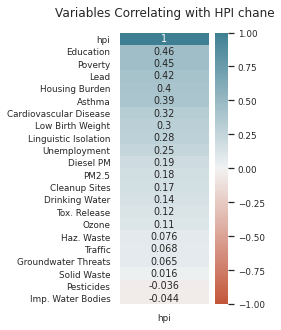

In [872]:
# check the correlation
plt.figure(figsize=(2,5))
sns.set(font_scale=.8)
mypalette = sns.diverging_palette(20,220, as_cmap=True)
heatmap = sns.heatmap(dfall.corr()[['hpi']].sort_values(by='hpi', ascending=False), vmin=-1, vmax=1, annot=True, cmap=mypalette)
heatmap.set_title('Variables Correlating with HPI chane', fontdict={'fontsize':12}, pad=16);
#plt.savefig('Survival_rate_corr_S1.png', dpi=300, bbox_inches='tight')

#### 5.1.3 summary statistics

In [433]:
#print out the basic summary statistics
dfall.describe()

Ozone  \
count                               3,730.0000   
mean                                    0.0483   
std                                     0.0102   
min                                     0.0266   
25%                                     0.0413   
50%                                     0.0468   
75%                                     0.0561   
max                                     0.0731   

                                         PM2.5  \
count                               3,730.0000   
mean                                   10.0948   
std                                     2.0231   
min                                     4.1178   
25%                                     8.5969   
50%                                     9.8435   
75%                                    11.8835   
max                                    15.8143   

                                     Diesel PM  \
count                               3,730.0000   
mean                                    0.1894   
std                                     0.1902   
min                                     0.0007   
25%                                     0.0672   
50%                                     0.1348   
75%                                     0.2511   
max                                     2.6053   

                                Drinking Water  \
count                               3,730.0000   
mean                                  461.7990   
std                                   214.5373   
min                                    32.5689   
25%                                   292.7500   
50%                                   418.2889   
75%                                   663.5141   
max                                 1,134.7667   

                                          Lead  \
count                               3,730.0000   
mean                                   47.7543   
std                                    21.7163   
min                                     1.0324   
25%                                    30.2263   
50%                                    46.9878   
75%                                    64.9788   
max                                    97.7963   

                                    Pesticides  \
count                               3,730.0000   
mean                                  245.3077   
std                                 2,369.1851   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.0000   
75%                                     0.0883   
max                                80,811.0894   

                                  Tox. Release  \
count                               3,730.0000   
mean                                1,580.7812   
std                                 3,289.9583   
min                                     0.0000   
25%                                   115.6091   
50%                                   480.1204   
75%                                 1,637.5983   
max                                80,652.8900   

                                       Traffic  \
count                               3,730.0000   
mean                                1,155.1843   
std                                 1,100.6620   
min                                    53.6972   
25%                                   580.6564   
50%                                   891.8175   
75%                                 1,453.6049   
max                                45,752.0000   

                                 Cleanup Sites  \
count                               3,730.0000   
mean                                    7.1303   
std                                    13.2609   
min                                     0.0000   
25%                                     0.0000   
50%                                     1.2500   
75%                                     9.0000   
max                              

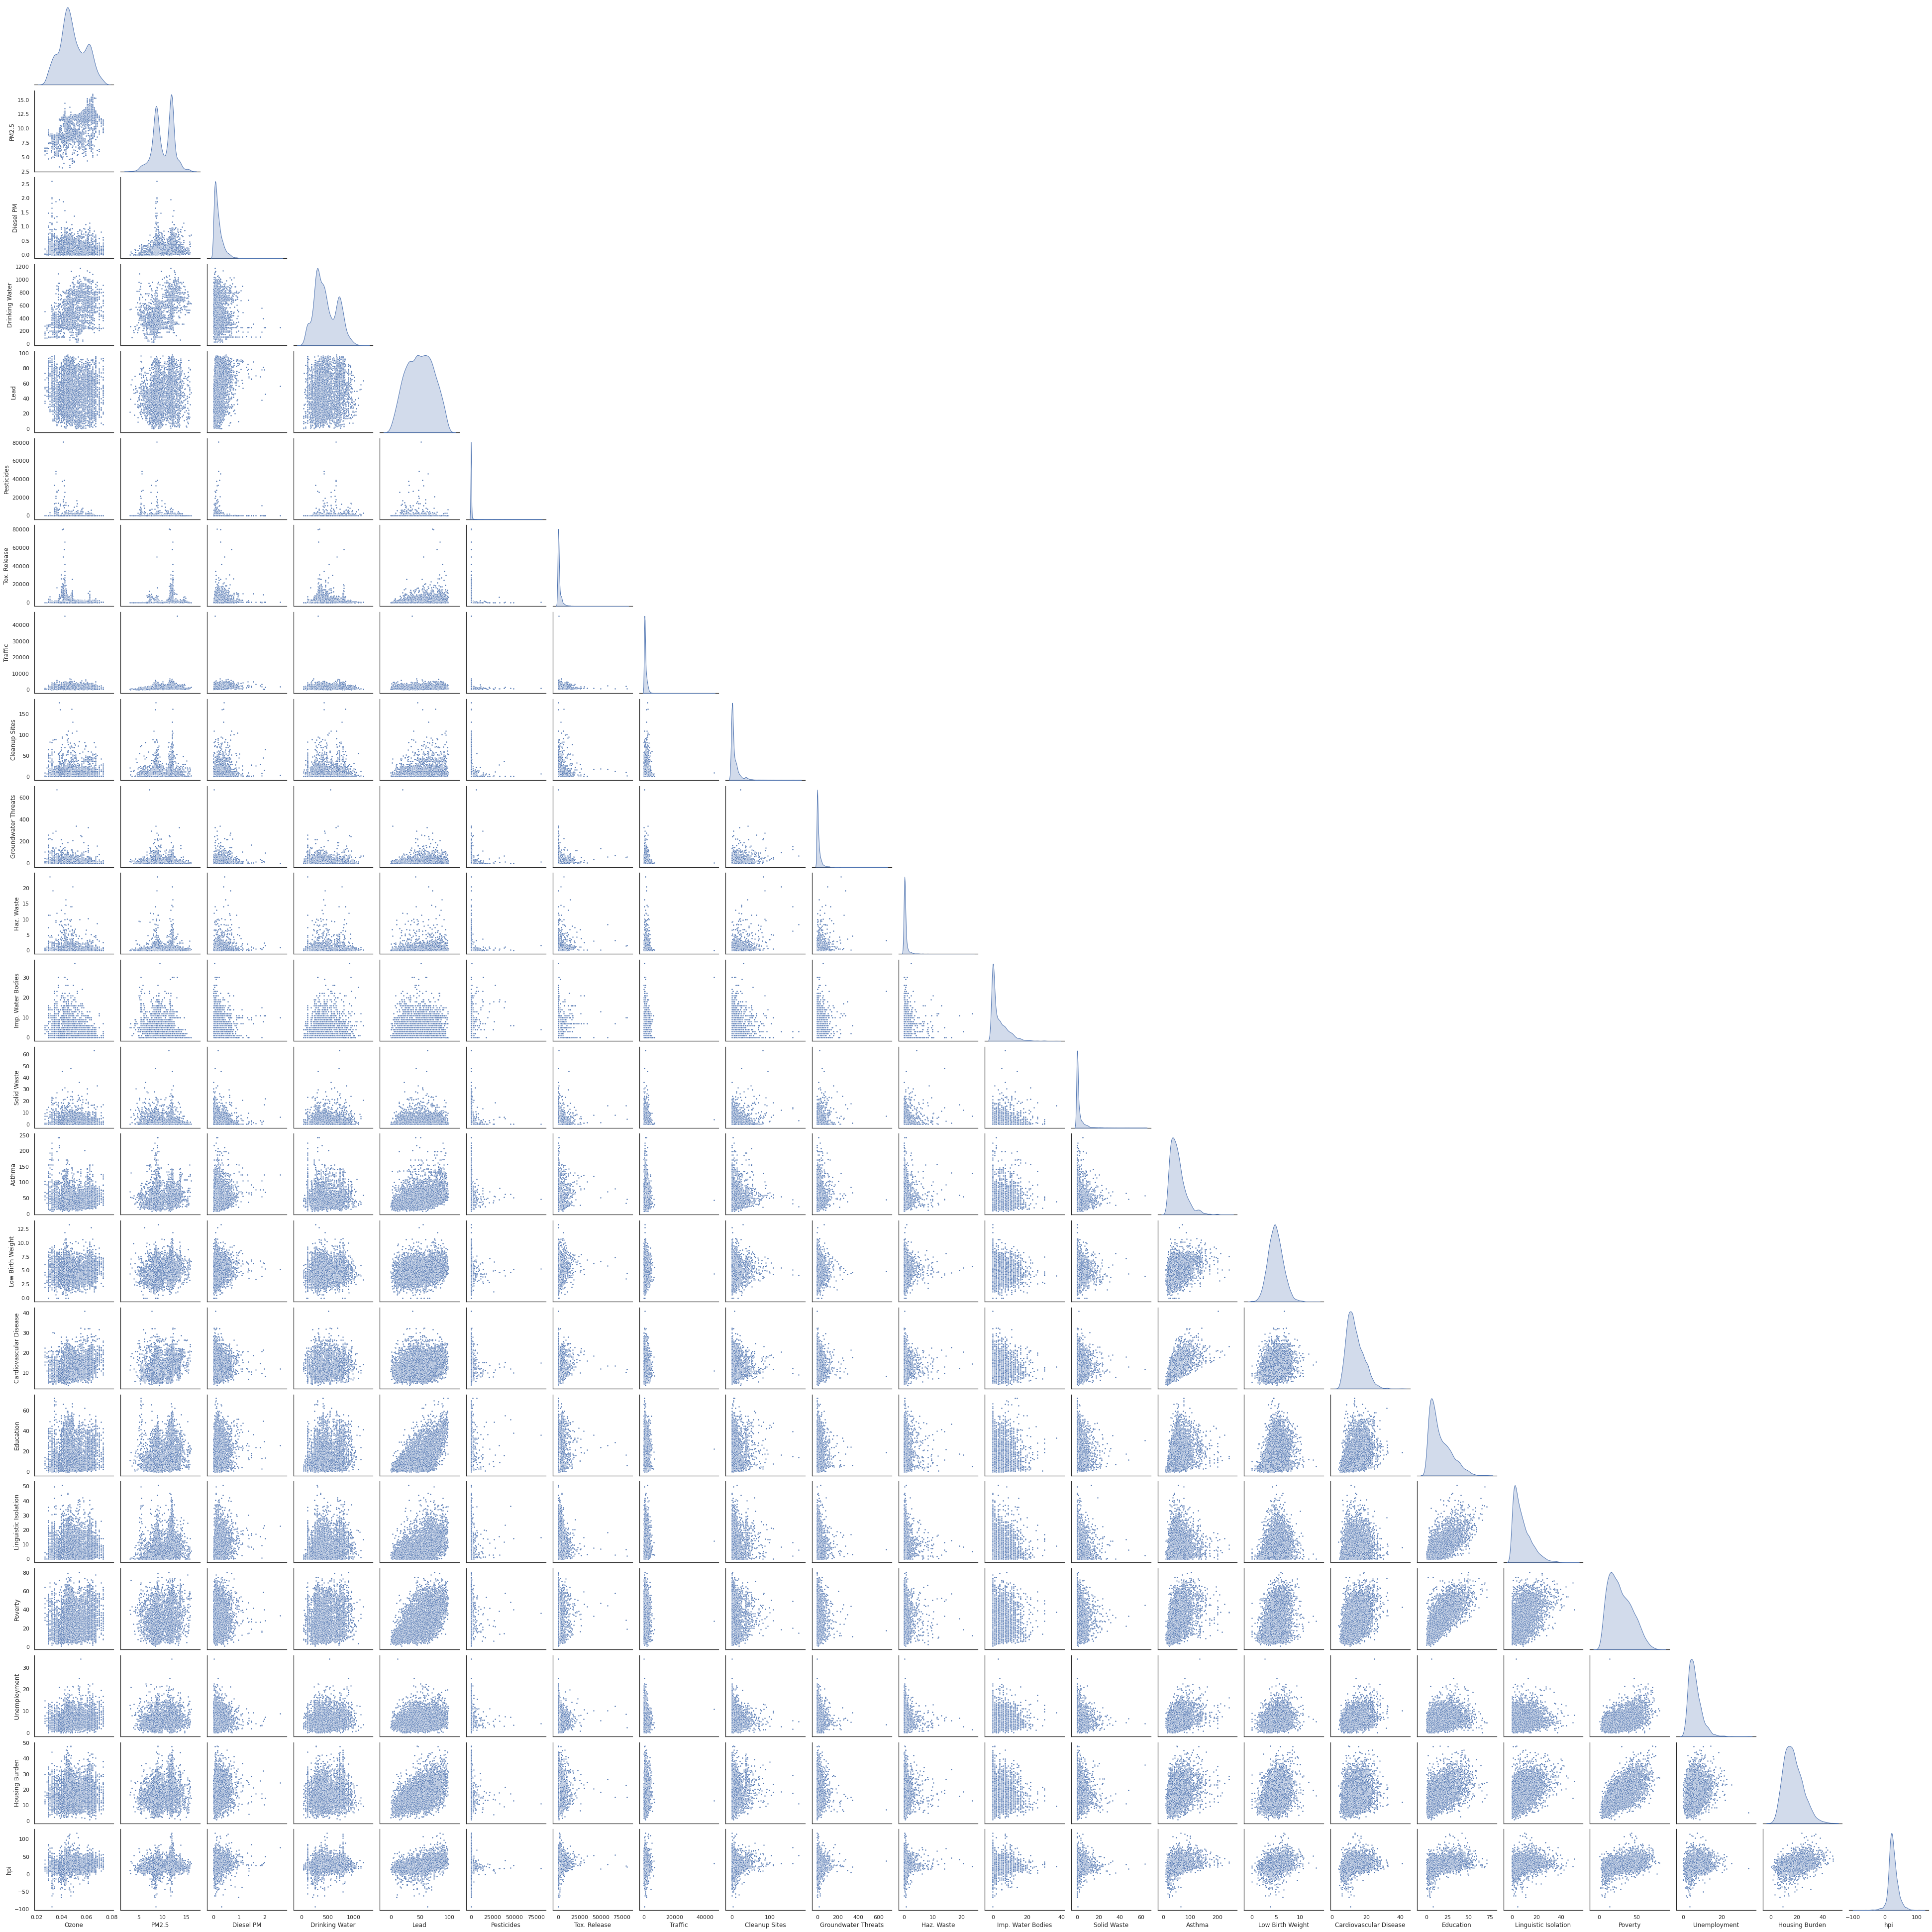

In [875]:
# use a quick plot to visualise the distribution of the variables
sns.set(style="white")
sns.pairplot(data=dfall, markers=".", diag_kind='kde', corner=True)

The KDE plots above show that most of the variables are not normaly distributed. Furthermore, as the last row of the scatterplots shows. none of the independent variables displays a linear relationship with the dependent variable(hpi). Therefore a multivariate linear regression model will not be appropriate for explaining this relationship.

array([[<AxesSubplot:title={'center':'Ozone'}>,
        <AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'Diesel PM'}>,
        <AxesSubplot:title={'center':'Drinking Water'}>,
        <AxesSubplot:title={'center':'Lead'}>],
       [<AxesSubplot:title={'center':'Pesticides'}>,
        <AxesSubplot:title={'center':'Tox. Release'}>,
        <AxesSubplot:title={'center':'Traffic'}>,
        <AxesSubplot:title={'center':'Cleanup Sites'}>,
        <AxesSubplot:title={'center':'Groundwater Threats'}>],
       [<AxesSubplot:title={'center':'Haz. Waste'}>,
        <AxesSubplot:title={'center':'Imp. Water Bodies'}>,
        <AxesSubplot:title={'center':'Solid Waste'}>,
        <AxesSubplot:title={'center':'Asthma'}>,
        <AxesSubplot:title={'center':'Low Birth Weight'}>],
       [<AxesSubplot:title={'center':'Cardiovascular Disease'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Linguistic Isolation'}>,
        <AxesS

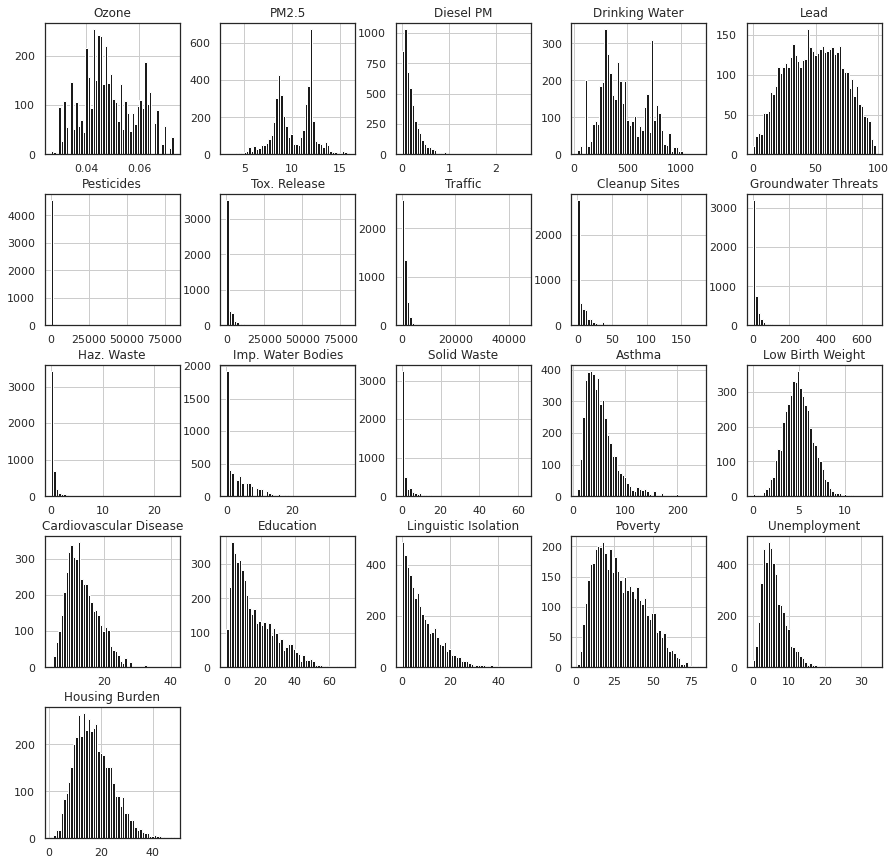

In [876]:
# plot the distribution of all independent variables 
dfall.drop("hpi", axis=1).hist(bins=50, figsize=(15, 15),color='k')

<AxesSubplot:ylabel='Frequency'>

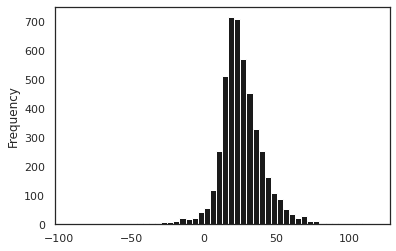

In [877]:
## plot histogram 
dfall['hpi'].plot.hist(bins=50 ,color='k') 

<AxesSubplot:>

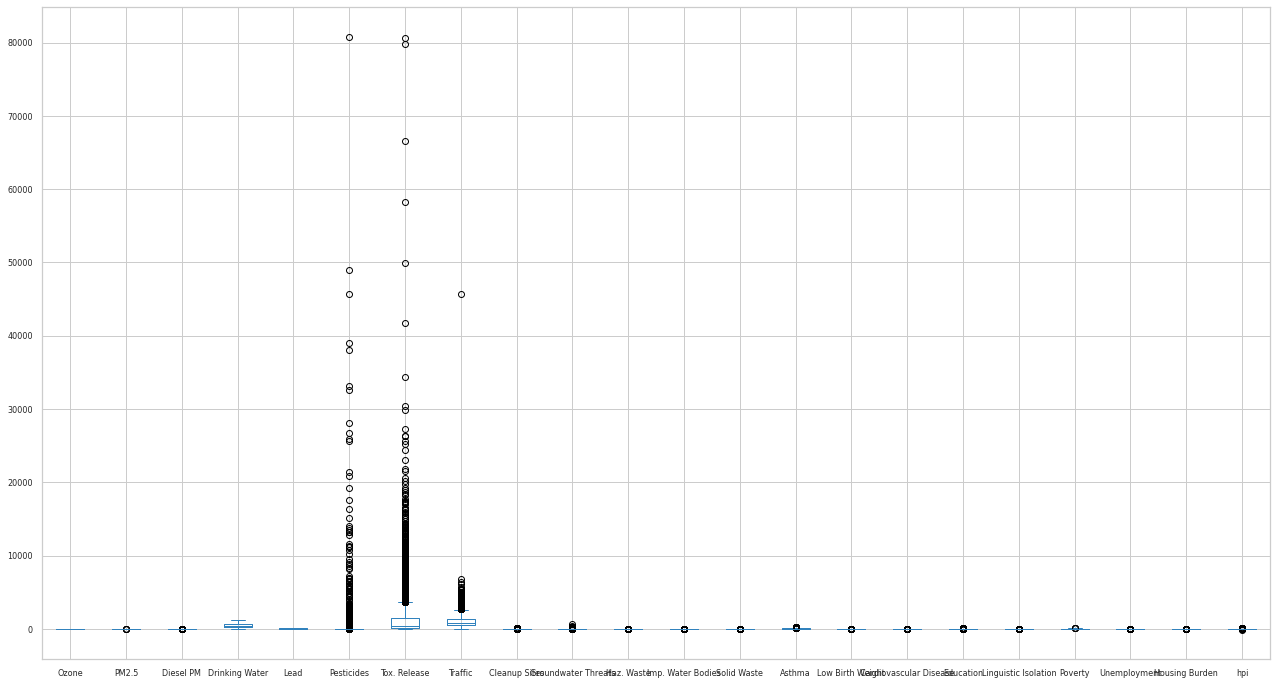

In [726]:
# boxplots 

sns.set_style("whitegrid")

dfall.boxplot(
            figsize=(22,12),fontsize =8, color = "#3182bd")

#plt.savefig("boxplots.png", bbox_inches = 'tight',dpi=300)

The boxplots indicate the existence of outliers in all variables with a few of them recording extreme outliers: "Pesticides","Tox.Resease", "Trafic"

In [727]:
dfall.columns

Index(['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides',
       'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma',
       'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'hpi'],
      dtype='object')

In [879]:
# create a list of the independent variables without the 3 varibles with extreme variables

boxplotlist =[ 'Ozone','PM2.5', 'Diesel PM'
             # , 'Drinking Water'
              , 'Lead',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'hpi']

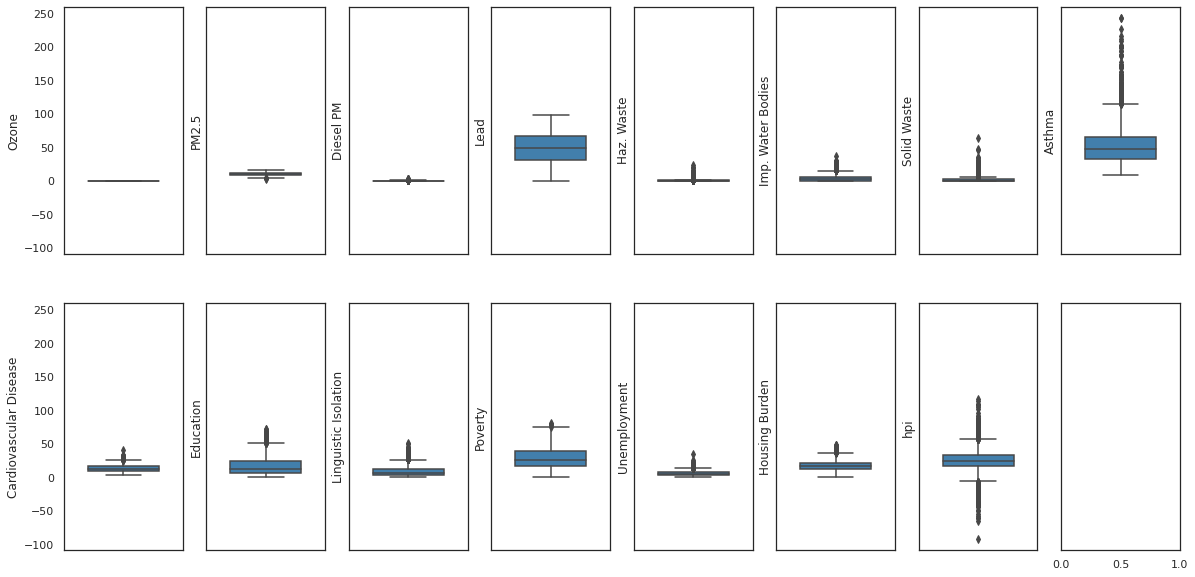

In [881]:
# print again the boxplots for better inspection

fig, ax = plt.subplots(2,8, figsize=(20, 10) ,sharey=True)
ax = ax.flatten()

for i in boxplotlist:
    sns.boxplot(y=i, data=dfall,width=0.6,ax=ax[boxplotlist.index(i)],color = "#3182bd")

## comment the boxplots, the spread and outliers

### 5.2 Data preparation

#### 5.2.1 train-test split

In [882]:
# split the data in training and testing set for linear and lasso regresssion (they do not need a validation data)
train_x, test_x, train_y, test_y = train_test_split(dfall.drop(['hpi'], axis = 1), dfall.hpi, random_state=random_state)

In [883]:
# TRAIN TEST SPLIT FOR VALIDATION!

# create the independent and dependent variables
X = dfall.drop(['hpi'], axis = 1)
y = dfall.hpi

print(X.shape)
print(y.shape)

# We apply train_test_split twice to obtain the three train, dev and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1024)


#print out the size of the different datasets created
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4675, 21)
(4675,)
(3272, 21)
(701, 21)
(702, 21)


#### 5.2.3. check for multicolinearity

Text(0.5, 1.0, 'Correlation Matrix')

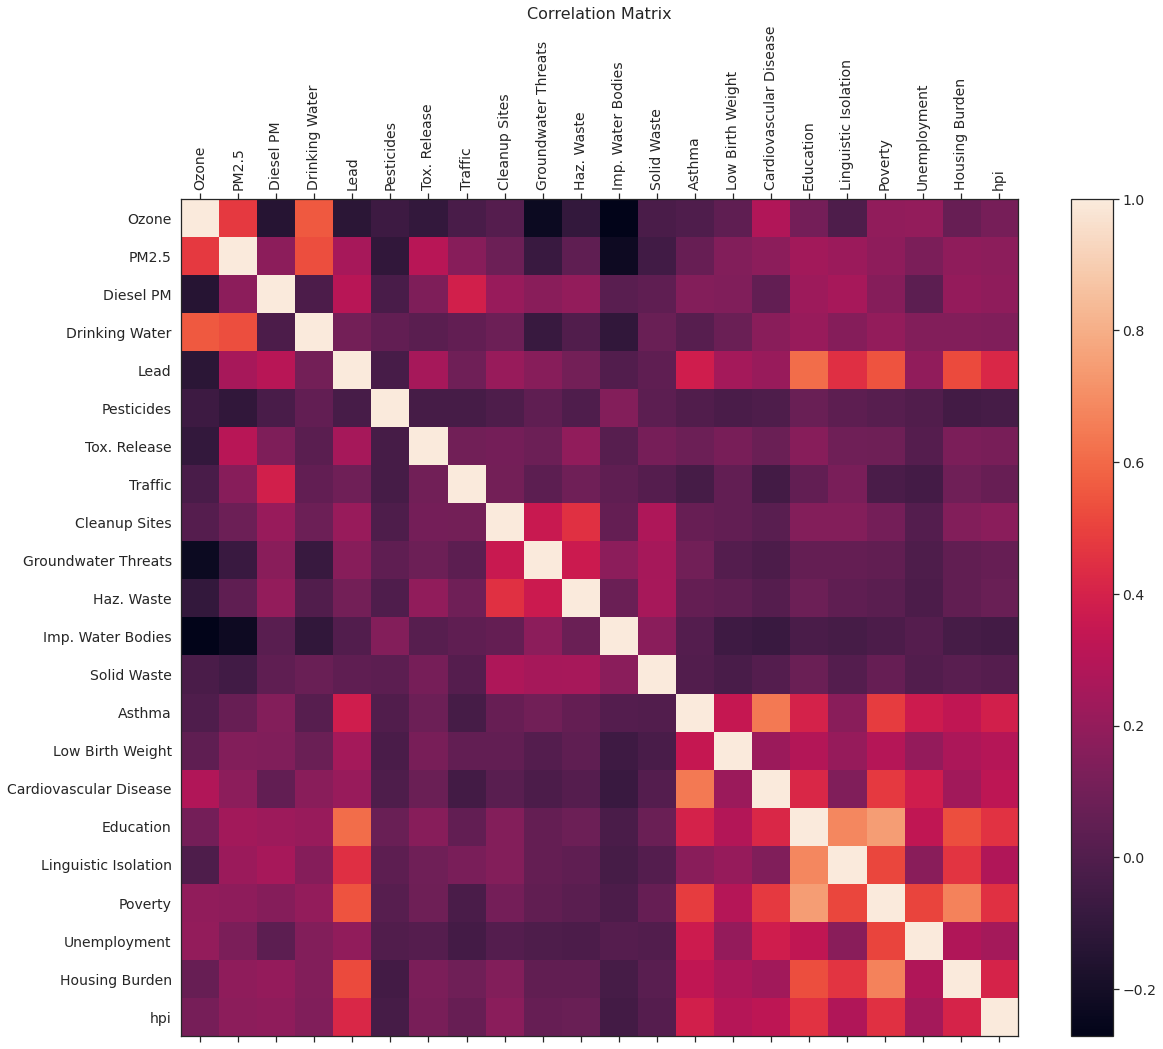

In [884]:
df = dfall
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [885]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [886]:
# using VIF on the bike_rental dataset

train_x_VIF = drop_column_using_vif_(train_x, thresh=5)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

Max VIF: 4.096780895432122
The columns remaining after VIF selection are:
Index(['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides',
       'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma',
       'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## comment better here NOTE: VIF drops NO variables!

### 5.3 In-depth Analysis

#### Linear regresssion  

In [735]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=train_y)

LinearRegression()

In [736]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  -3.488562234279545
                       var                                     coef
0                    Ozone                                 147.5083
1                    PM2.5                                  -0.4418
2                Diesel PM                                   2.9040
3           Drinking Water                                   0.0014
4                     Lead                                   0.0981
5               Pesticides                                  -0.0002
6             Tox. Release                                   0.0001
7                  Traffic                                   0.0005
8            Cleanup Sites                                   0.1163
9      Groundwater Threats                                   0.0067
10              Haz. Waste                                  -0.0562
11       Imp. Water Bodies                                  -0.1415
12             Solid Waste                                  -0.1672
13           

In [737]:
print('R2:')
lr.score(X=train_x_VIF, y=train_y)

R2:


0.32569085471214687

## use more detailed form sckit learn? add residuals plot? or p values for stat signif)

In [887]:
# select the same columns from test_x as train_x_VIF
test_x_VIF = test_x[train_x_VIF.columns] # select the VIF columns that the train date by using it as a selector

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=test_y)

0.32404448595910973

<AxesSubplot:title={'center':'Modal Coefficients'}>

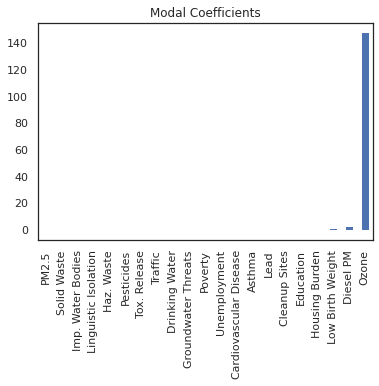

In [888]:
#checking the magnitude of coefficients

predictors = train_x_VIF.columns

coef = pd.Series(lr.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

#### Random Forest

The [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) is an ensemble method, fitting multiple Decision Tree Classifiers on subsets of the dataset. The output is the average of these sub-trees. 

In [751]:
from sklearn.ensemble import RandomForestRegressor

#use the RandomForestRegressor with default hyperparameters
reg_random_forest = RandomForestRegressor(random_state=random_state)

#make sure to use the right train test (since I want to do validation as well)
reg_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

We can check the R2 score of this model.

In [752]:
print("R2 on the training data:")
print(reg_random_forest.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(reg_random_forest.score(X=X_test, y=y_test))

R2 on the training data:
0.9118727668621767
R2 on the testing data:
0.3391505602537558


## add better comment
NOTE: overfitting on the training data. Mediocre performance on the testing data

**HYPERPARAMETER TUNING**

two methods will be compared:
* Holdout validation (grid search)
* Cross validation (grid search)

The hyperparameters we will tune are: 
* ```n_estimators ```(default=100): The number of decision trees.

    Usually a higher number of trees improves the model's performance. However it is also slowing down the training process. 
        
      
* ```max_depth``` (default=None): The depth (splits) of each tree 
   
   Usually the deeper the tree the more information it captures about the data. However allowing maximum depth might result in overfitting. 
   
Before proceding however we will first use the **validation curve** (also based on cross validation) to get an estimate of the right values for the hyperparameters tested for with the two validation methods.


In [753]:
%%time
n_estimators_range = [10,50,100,150,200,250]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

CPU times: user 1min 24s, sys: 39.8 ms, total: 1min 24s
Wall time: 1min 24s


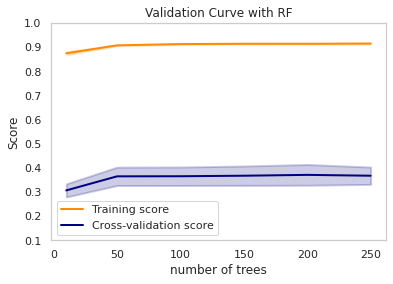

CPU times: user 201 ms, sys: 6 µs, total: 201 ms
Wall time: 194 ms


In [754]:
%%time

# plotting the validation curve for n_estimators
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

The plot above shows that  the training and development scores do not change significantly with the number of trees and the score seems to stabilise after the value of approximately 100 trees

In [755]:
%%time
max_depth_range= [5,10,13,15,18]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv=5)

CPU times: user 52.9 s, sys: 80.1 ms, total: 53 s
Wall time: 53 s


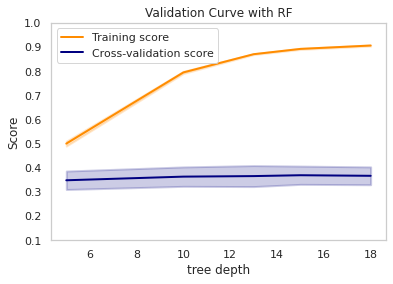

CPU times: user 227 ms, sys: 10 ms, total: 237 ms
Wall time: 230 ms


In [756]:
%%time

# plotting the validation curve for max_depth

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"tree depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(max_depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(max_depth_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Tree depth seems to affect the score values more, with the training score to imporve when the tree is deeper as expcected. However the validation score seems to only slightly vary between the values of  10-18

In [757]:
# set values for the hyperparameters tuning
estimatorlist= [50,100,120,150,200,220]
depthlist= [8,10,13,15,18]

##### **Holdout validation**

Holdout validation will be used here, by specifing the 'cv' parameter (the cross validation splitting strategy) as an iterable yielding (train, test) as arrays of of indices. 

In [758]:
# merge training and validation data, as required by GridSearchCV
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])                       

# the index list of training and validation data in the merged dataset
# in X_train_val, the first n rows are from X_train and the remaining rows are from X_val. Here n=X_train.shape[0]
ind_train = list(range(X_train.shape[0]))
ind_val = list(range(X_train.shape[0], X_train_val.shape[0]))

In [759]:
%%time

from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators': estimatorlist
             ,'max_depth': depthlist
             }

rf = RandomForestRegressor(random_state=random_state)

# cv: An iterable yielding (train, test) splits as arrays of indices.
clf = model_selection.GridSearchCV(rf, parameters, cv=[(ind_train, ind_val)])

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 18, 'n_estimators': 220}
The best score is: 
0.326612504174577
CPU times: user 1min 54s, sys: 49.8 ms, total: 1min 54s
Wall time: 1min 54s


Now a final model with the tuned hypermarameters can be created:

In [760]:
%%time
rf_final = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'], random_state=random_state)
rf_final.fit(X_train, y_train)

CPU times: user 6.89 s, sys: 19.9 ms, total: 6.91 s
Wall time: 6.91 s


RandomForestRegressor(max_depth=18, n_estimators=220, random_state=42)

In [761]:
%%time
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.9077891878539069
The score on the development data:
0.326612504174577
CPU times: user 152 ms, sys: 11 µs, total: 152 ms
Wall time: 148 ms


The Random Forest Regressor Model tuned with Holdout Validation has (very) sligly improved the performance.

and also slightly reduced the difference between the sore on the training and **development** data


##### **Cross-validation**

Cross-validation is considered more robust. 


In [762]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

In [763]:
%%time
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators': estimatorlist
              ,'max_depth':depthlist
             }
rf = RandomForestRegressor()

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 13, 'n_estimators': 200}
The best score is: 
0.3788545683847266
CPU times: user 8min 26s, sys: 169 ms, total: 8min 26s
Wall time: 8min 26s


In [764]:
rf_final = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'], random_state=random_state)
rf_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, n_estimators=200, random_state=42)

In [765]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.8631251482625475
The score on the development data:
0.3194009928704118


The Random Forest Regressor Model tuned with Cross Validation, returns slightly better results (higher R2 score on the developent data) and a smaller difference with the training data, compared to the holdout validation method. 

##### RF final estimate of performance 

Using the test set(that has not been used at any stage during the model training andn validation process) the final estimate of the RF model can be reported. 

In [766]:
rf_final.score(X_test, y_test)

0.3405877916360842

##### Indicative Tree Visualisation

Since Random forest is an essemble method, it does not really make sense to visualise the trees. However, visualising a few trees can give an indicative image and help at interpreting the results. 

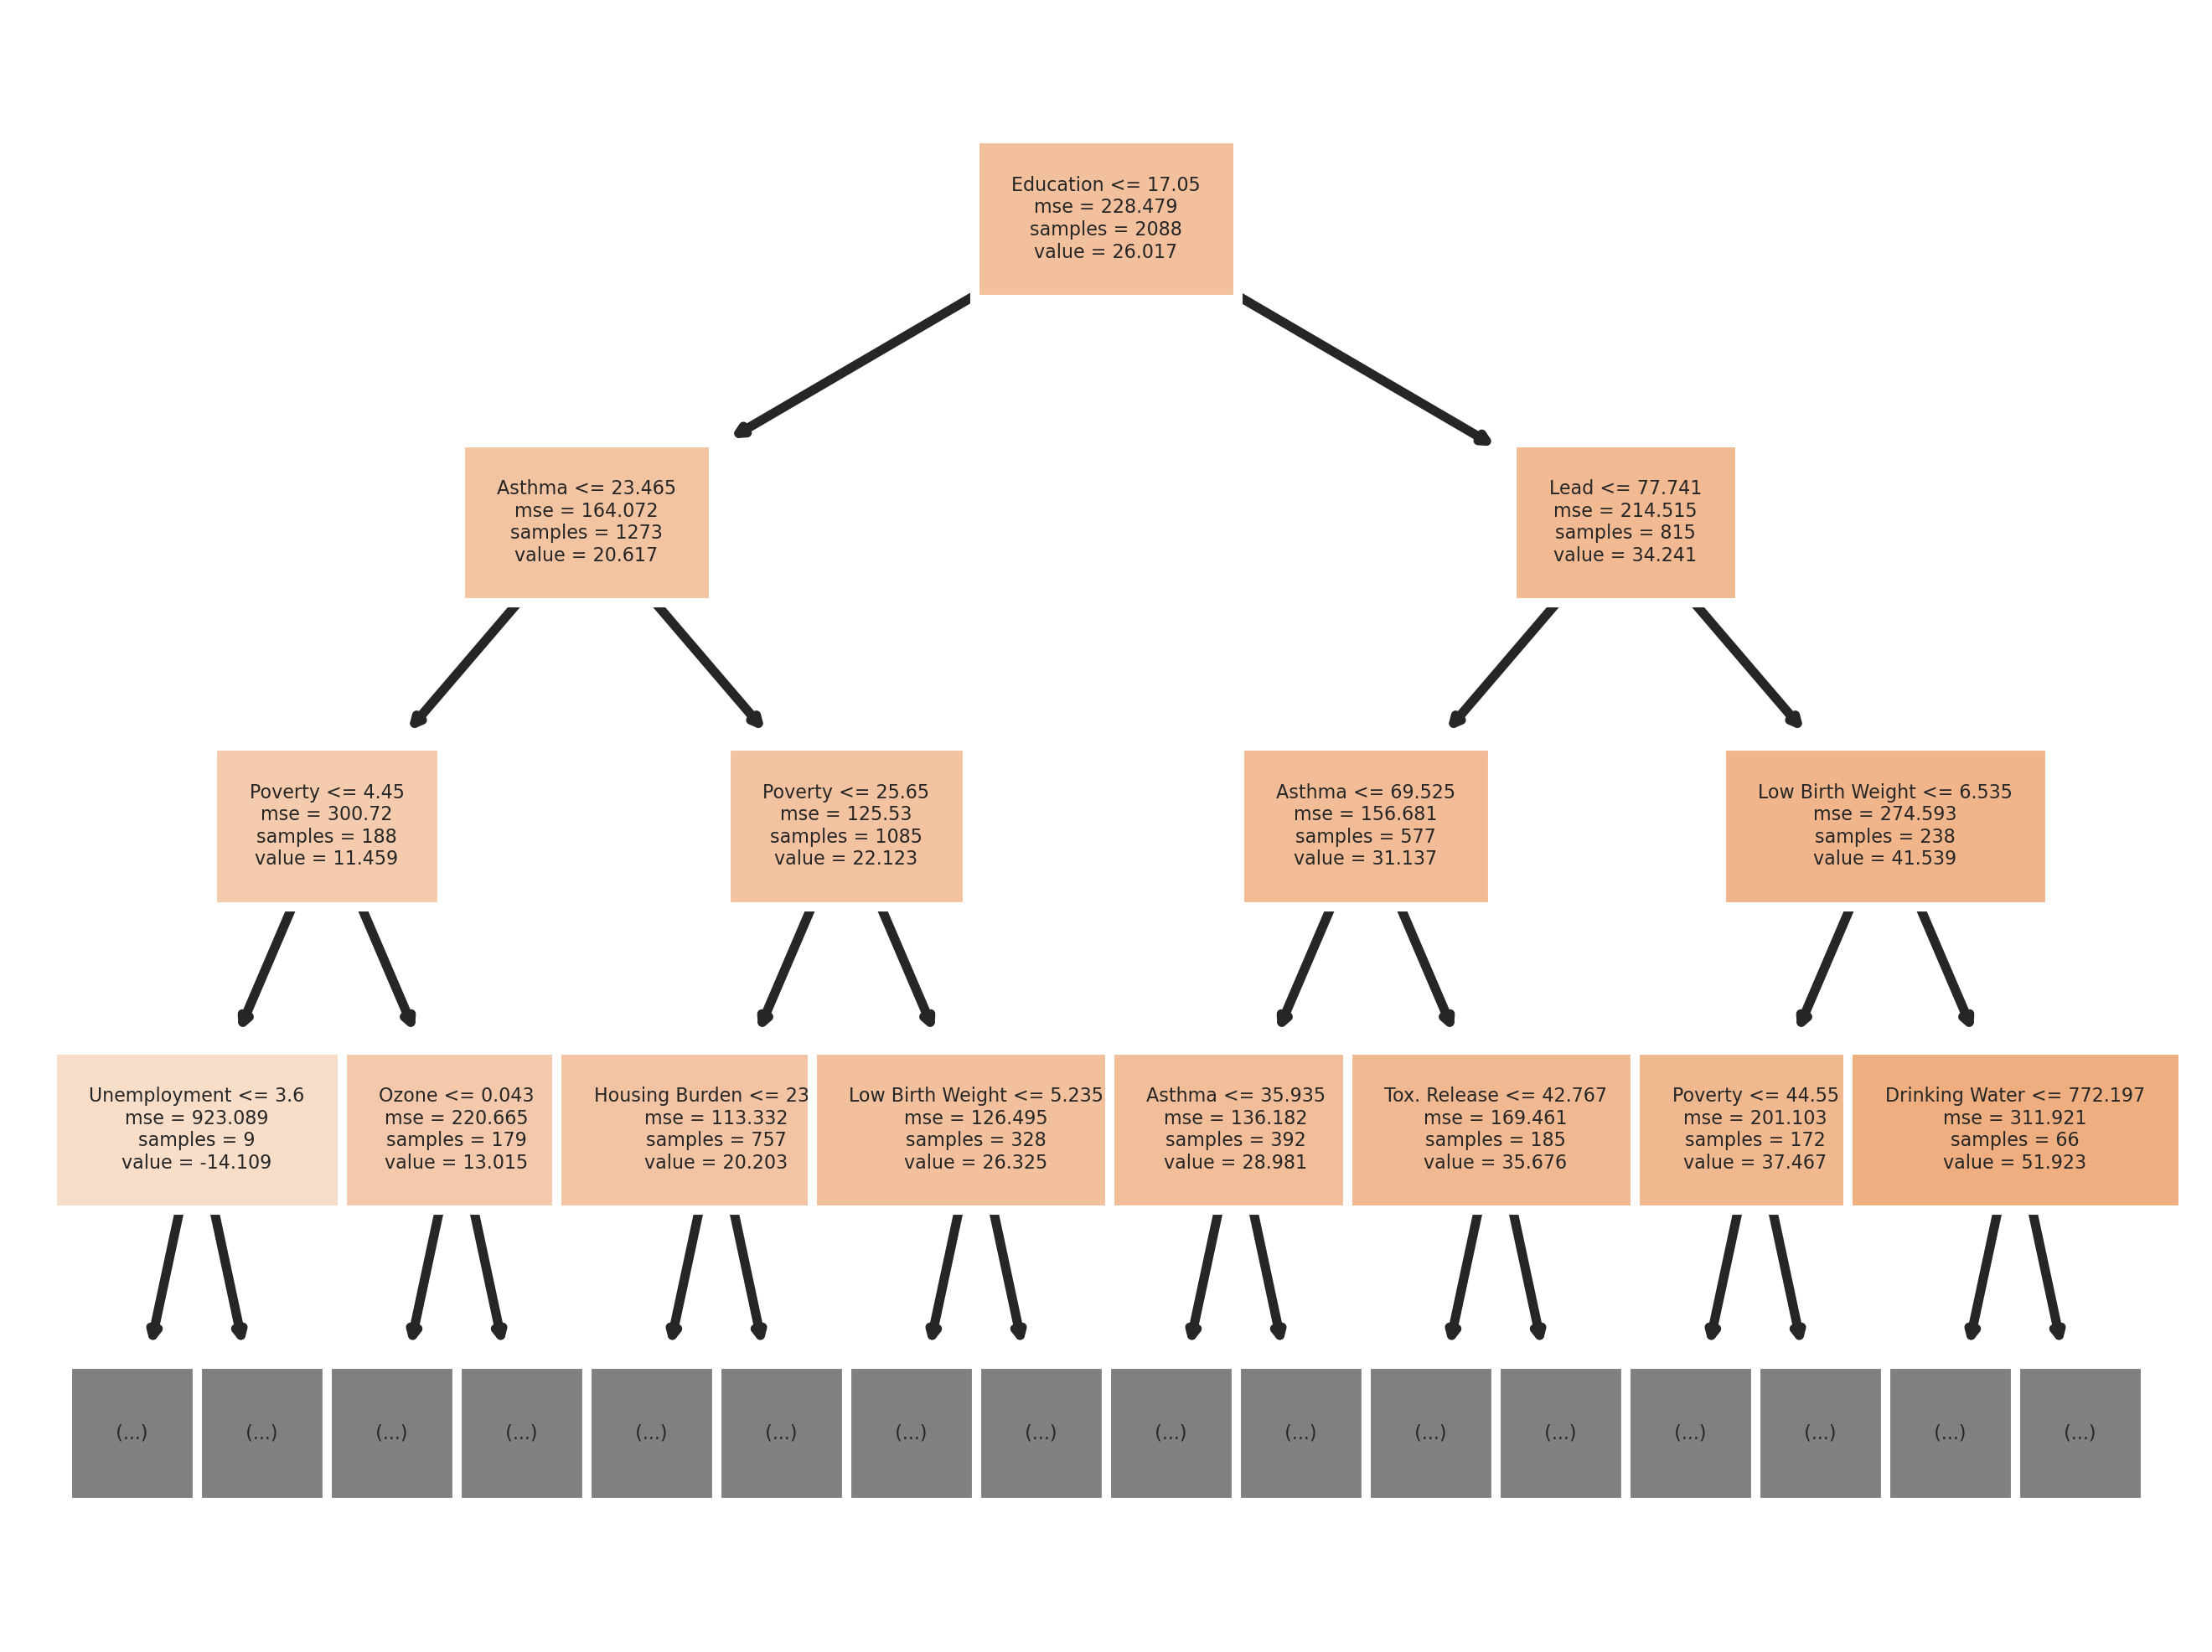

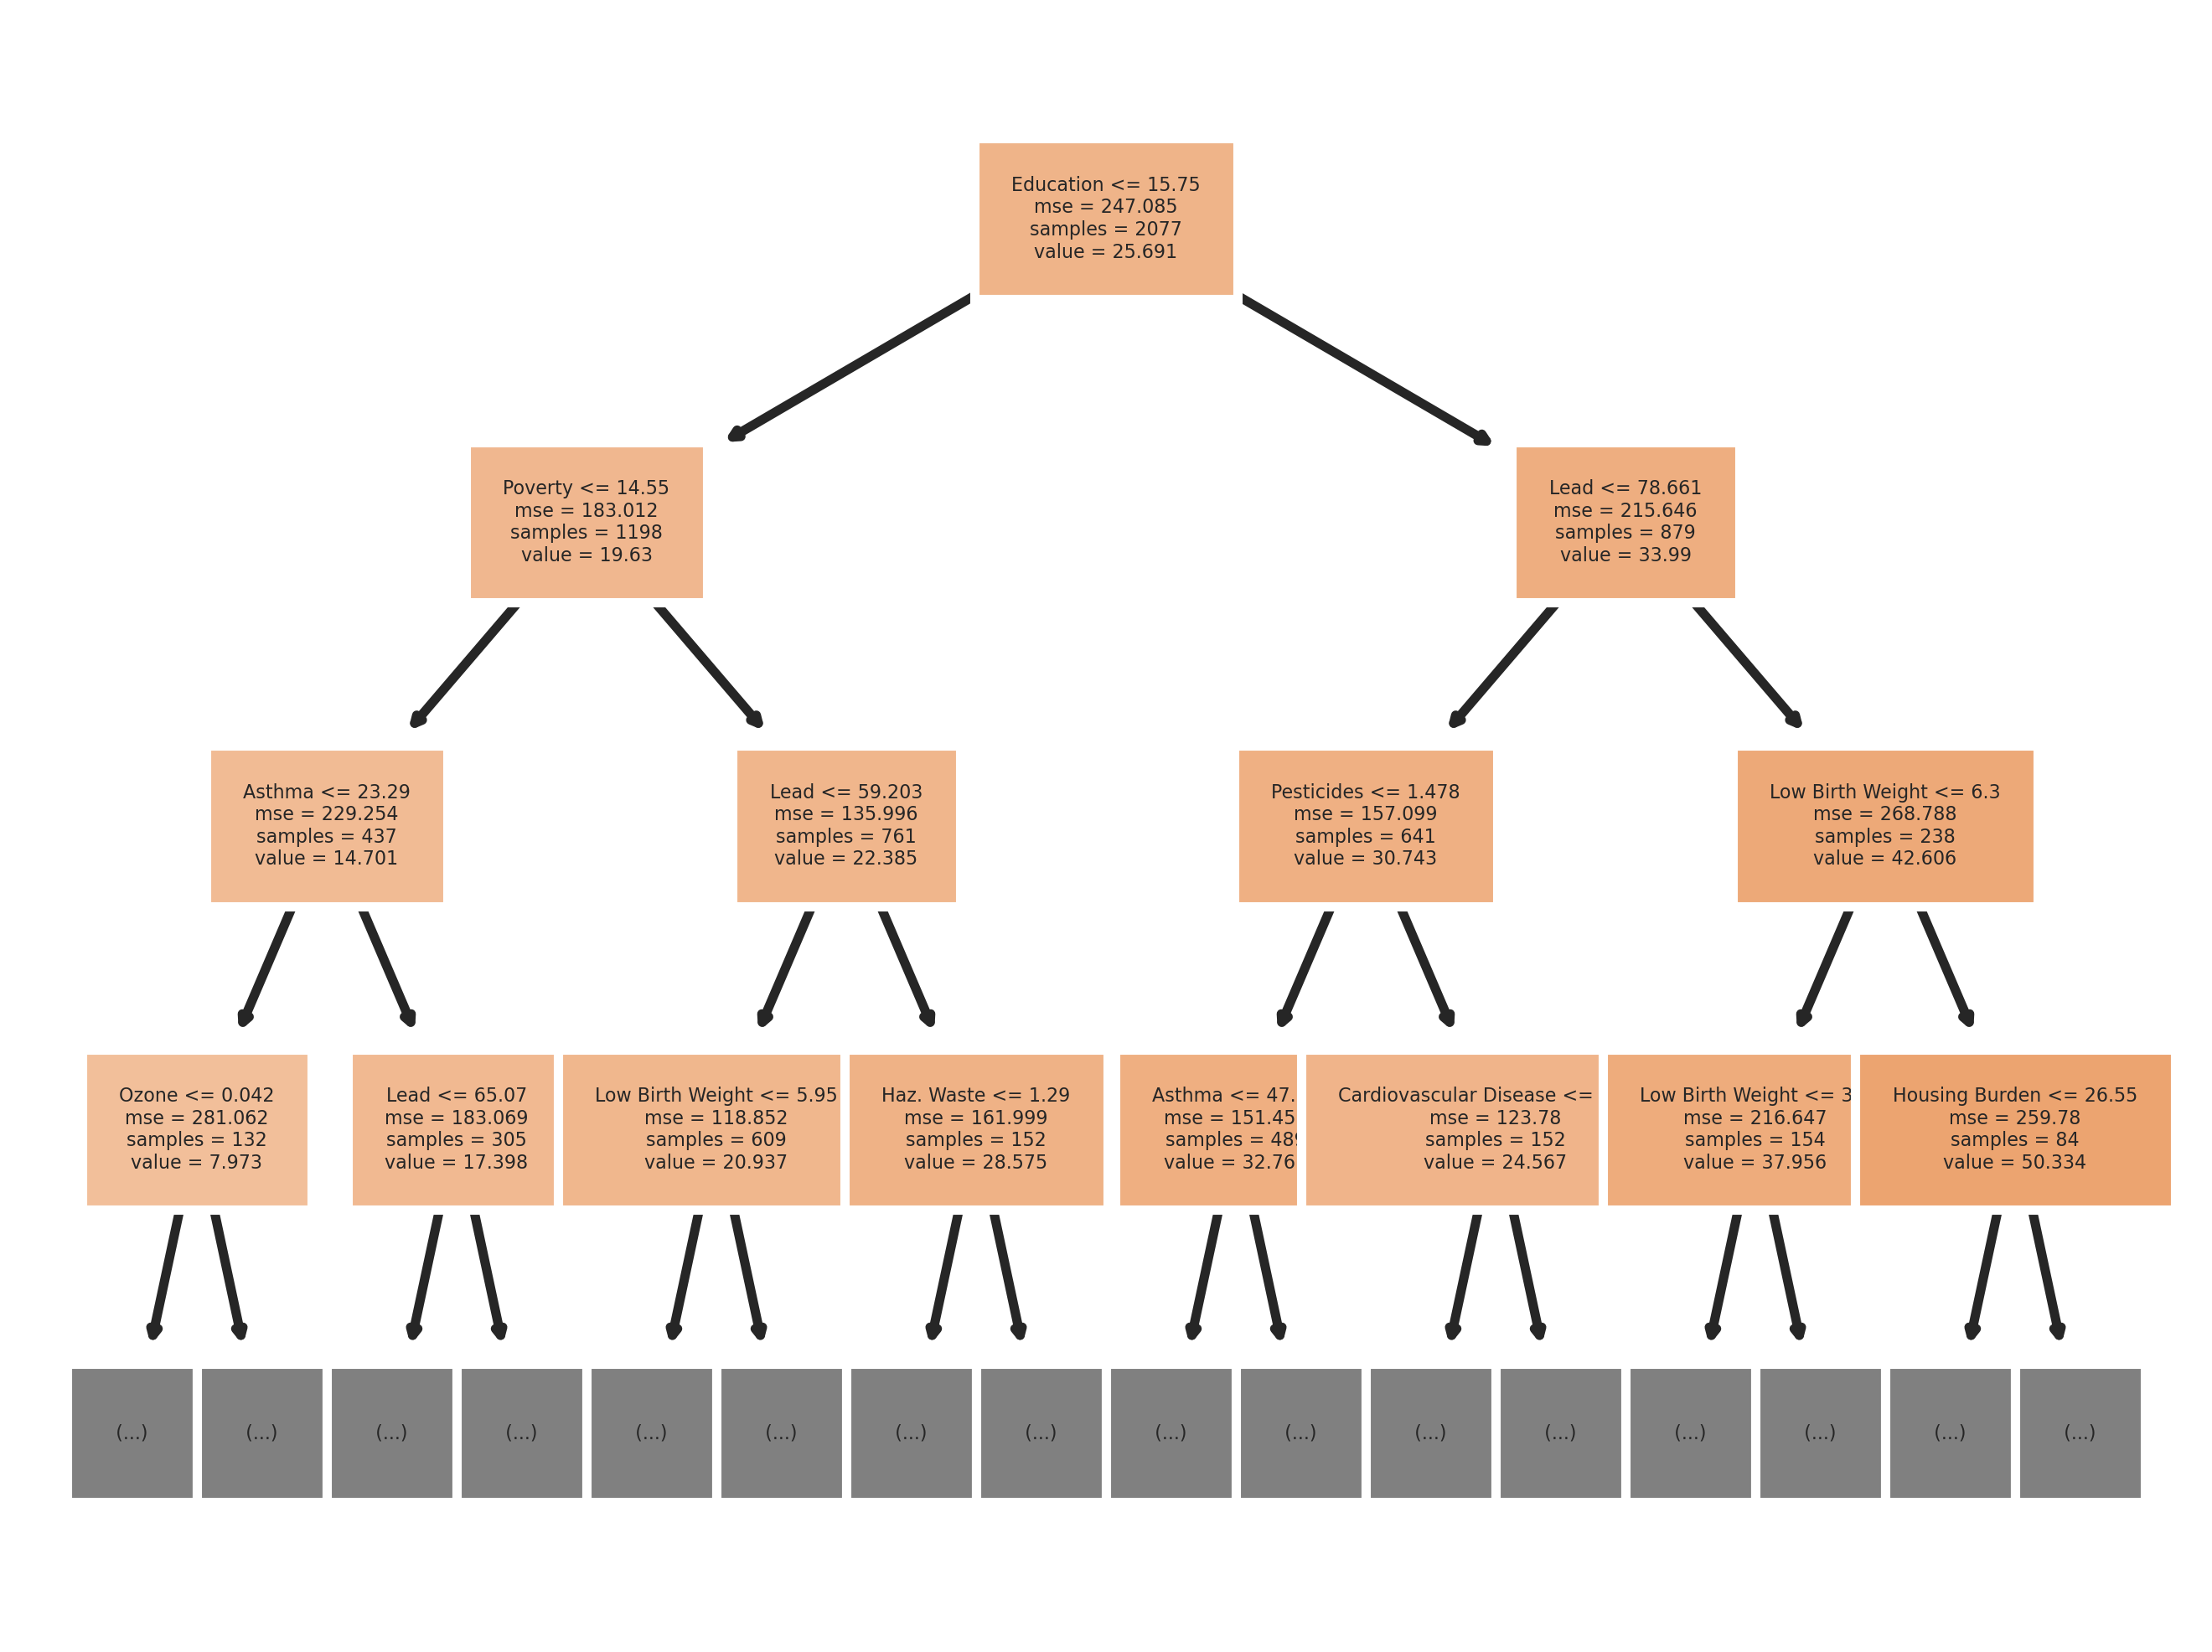

In [767]:
# code from https://github.com/UCL-DSS/random-forest-workshop/blob/main/Workshop.ipynb
#The best parameter value is: {'max_depth': 15, 'n_estimators': 200}


from sklearn import tree

import numpy as np
a = np.array(y_test.unique())
a = a.astype('<U10')
a

#visulise the first 2 trees
for x in range (0, 2):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=800)
    tree.plot_tree(rf_final.estimators_[x],max_depth=3, fontsize=2,
                   feature_names = X.columns, 
                   class_names = a,
                   filled = True)

##### Interpretation: permutation feature importance

Using the rfpimp package, the importance of each variable can be computed. For this the testing set needs to be used (not used for model training) to avoid biased results. 

In [768]:
! pip install rfpimp

In [769]:
%%time
import rfpimp
imp = rfpimp.importances(rf_final, X_test, y_test) # permutation
print(imp)
#viz = rfpimp.plot_importances(imp)
#viz.view()

                                                     Importance
Feature                                                        
Education                                                0.1332
Asthma                                                   0.0523
Lead                                                     0.0288
Ozone                                                    0.0286
Drinking Water                                           0.0201
Linguistic Isolation                                     0.0136
Housing Burden                                           0.0120
Tox. Release                                             0.0104
Unemployment                                             0.0096
Pesticides                                               0.0096
PM2.5                                                    0.0096
Diesel PM                                                0.0081
Cardiovascular Disease                                   0.0075
Poverty                                 

Text(0.5, 1.0, 'Feature importances from the Random Forest Regressor')

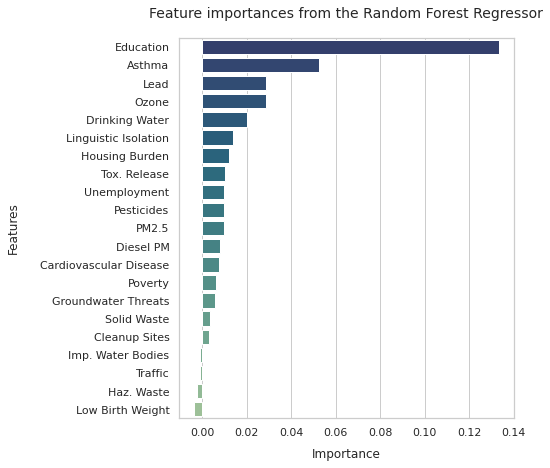

In [770]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 7))

ax = sns.barplot( x="Importance",
                  y=imp.index.values, 
                 #hue="room_type",
                  data=imp,
                  order = imp.index.values,
                  palette="crest_r")

#plt.xlabel(None)
#lt.ylabel(None)

ax.set_xlabel("Importance", 
             fontsize = 12,
             labelpad = 10)
ax.set_ylabel("Features",
             fontsize = 12,
             labelpad = 20)
ax.set_title("Feature importances from the Random Forest Regressor", size=14, pad = 20)

#plt.savefig("Percentage of Women with higher education2.png", bbox_inches = 'tight', dpi=300)

### viz test
https://linuxtut.com/en/a135cc5a7cd1bbadfc2f/


In [771]:
# function to visualise the accuracy of the prediction results
def val_vs_predict_plot(yval, yval_predict, ytest, ytest_predict, title):
    yval_array = np.array(yval)
    ytest_array = np.array(ytest)
    yval_predict_array = np.array(yval_predict)
    ytest_predict_array = np.array(ytest_predict)
    y_values = np.concatenate([yval_array, yval_predict_array]).flatten()
    ymin, ymax = np.amin(y_values), np.amax(y_values)
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(yval_array, yval_predict_array, label='validation set', color='blue', alpha=0.4)
    plt.scatter(ytest_array, ytest_predict_array, label='test set', color='tomato', alpha=0.4)
    plt.plot([ymin, ymax], [ymin, ymax])
    plt.xlabel('actual values', fontsize=24)
    plt.ylabel('predicted values', fontsize=24)
    plt.title(f'{title}-Validation-Prediction Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.legend()
    plt.show()

valid_R2: 0.3194009928704118
test_R2: 0.3405877916360842


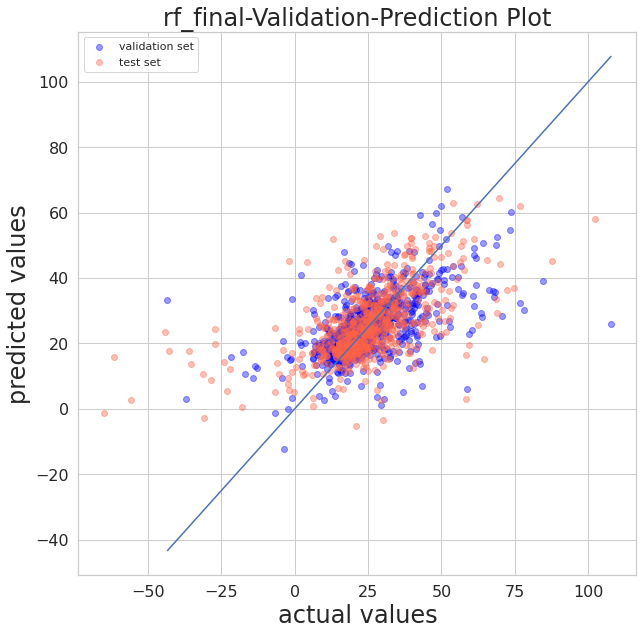

In [772]:
from sklearn.metrics import mean_squared_error

y_pred_val = rf_final.predict(X_val)
y_pred_test = rf_final.predict(X_test)
#print('='*20)
#print('RandomForestClassifier')
#print(f'valid_RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}')
#print(f'test_RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}')
print(f'valid_R2: {rf_final.score(X_val, y_val)}') 
print(f'test_R2: {rf_final.score(X_test, y_test)}')
val_vs_predict_plot(y_val, y_pred_val, y_test, y_pred_test, 'rf_final')

#### GBDT and XGBoost

A GBDT (Gradient Boosting Decision Tree) model will be used and compared to the previous models. 

The main difference to The random forest, is that in this ensemble learning the models are trained sequentially using the results of previous models as an input to the next(by assigning lower weight to correctly predicted outcomes and higher weight to the wrongly predicted outcomes) [LINK](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663)

The [XGBoost](https://xgboost.readthedocs.io/en/stable/parameter.html) package will be used for this

In [773]:
# ! pip install XGBoost

In [774]:
import xgboost as xgb

#create the XGB boost model with default hyperparameters
xgb_model = xgb.XGBRegressor(random_state = random_state)

#fit the model the training set
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Compare the perfomance of the XGBmodel on the training and testing set:

In [775]:
print("R2 on the training data:")
print(xgb_model.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(xgb_model.score(X=X_test, y=y_test))

R2 on the training data:
0.9771590642550826
R2 on the testing data:
0.34271243293721376


The XGB model seems to perform better than the previous models on the testing set, but this uncalibrated model does not perform well on the testing data

**HYPERPARAMETER TUNING**

Similarly to the above, two methods will be compared:
* Holdout validation (grid search)
* Cross validation (grid search)

The hyperparameters we will tune are: 
* ```n_estimators ```(default=100): The number of decision trees.

    Usually a higher number of trees improves the model's performance. However it is also slowing down the training process. 
        
      
* ```max_depth``` (default=6): The depth (splits) of each tree 
   
   Usually the deeper the tree the more information it captures about the data. However allowing maximum depth might result in overfitting. 
   
* ```learning_rate``` (default=0.3): 

* ```colsample_bytree``` (default=1): 


Before proceding however we will first use lineplots to get an estimate of the right values for the hyperparameters tested for with the two validation methods.
The code below is based on this [article](https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92)

NOTE: cross- validation is more robust, but is more computational intensive

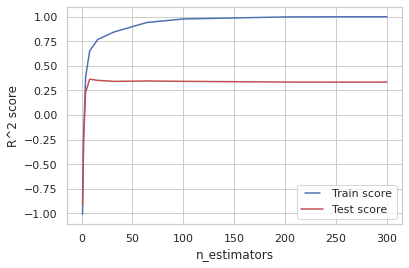

In [776]:

#Code adapted from: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 250,300]
train_results = []
test_results = []

for estimator in n_estimators:
    xr = xgb.XGBRegressor(random_state=random_state, n_estimators=estimator, n_jobs=-1)
    xr.fit(X_train, y_train)   
    
    score_train = xr.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = xr.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train score')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('n_estimators')
plt.show()

The plot above shows that the R2 score stabilises between approximatelly 150 and 200 estimators

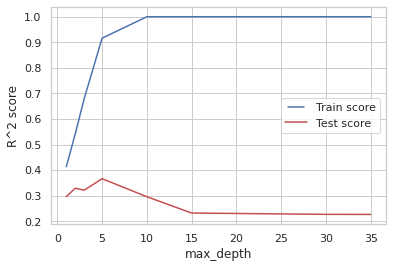

In [777]:
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

max_depths = [1,2,3,5,10,15,30,35]
train_results = []
test_results = []

for max_depth in max_depths:
    xr = xgb.XGBRegressor(random_state=random_state, max_depth=max_depth, n_jobs=-1)
    xr.fit(X_train, y_train)   
    
    score_train = xr.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = xr.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train score')
line2, = plt.plot(max_depths, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('max_depth')
plt.show()

The above plot indicates that the best R2 scores for the testing data occur at a max depth value of 3-5 trees and for the training data the R2 scores seem to stabilise after about the max depth value of 10.

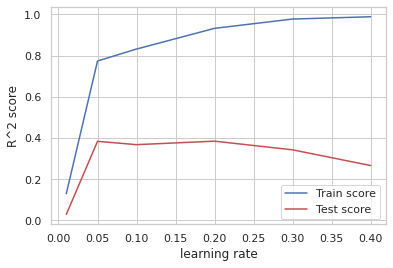

In [778]:
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

#max_depths = int(np.linspace(1, 32, 32, endpoint=True))
learning_rates = [0.01,0.05,0.1,0.2,0.3,0.4]

train_results = []
test_results = []

for learning_rate in learning_rates:
    xr = xgb.XGBRegressor(random_state=random_state, learning_rate=learning_rate, n_jobs=-1)
    xr.fit(X_train, y_train)   
    
    score_train = xr.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = xr.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
lcine1, = plt.plot(learning_rates, train_results, 'b', label='Train score')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('learning rate')
plt.show()

The above plot indicates that the best R2 scores for the testing data occur at a learning rate of around 0.05 and for the training data the R2 scores seem to continuously increase

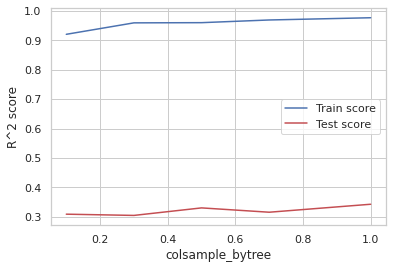

In [779]:
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

#max_depths = int(np.linspace(1, 32, 32, endpoint=True))
colsamples = [0.1,0.3,0.5,0.7,1]

train_results = []
test_results = []

for colsample in colsamples:
    xr = xgb.XGBRegressor(random_state=random_state, colsample_bytree=colsample, n_jobs=-1)
    xr.fit(X_train, y_train)   
    
    score_train = xr.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = xr.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
lcine1, = plt.plot(colsamples, train_results, 'b', label='Train score')
line2, = plt.plot(colsamples, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('colsample_bytree')
plt.show()

In [780]:
# set values for the hyperparameters
estimatorlist= [10,15,20,100,200,250]
depthlist= [2,5,10,12,15,30]
learningratelist = [0.01, 0.05, 0.1,0.3]
colsampletreelist = [0.5, 0.7]


##### **Holdout validation**

Holdout validation will be used here, by specifing the 'cv' parameter (the cross validation splitting strategy) as an iterable yielding (train, test) as arrays of of indices. 

In [781]:
# merge training and validation data, as required by GridSearchCV
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])                       

# the index list of training and validation data in the merged dataset
# in X_train_val, the first n rows are from X_train and the remaining rows are from X_val. Here n=X_train.shape[0]
ind_train = list(range(X_train.shape[0]))
ind_val = list(range(X_train.shape[0], X_train_val.shape[0]))

In [782]:

from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators': estimatorlist
             ,'max_depth': depthlist
              ,'learning_rate': learningratelist
              ,'colsample_bytree': colsampletreelist
             }

xr = xgb.XGBRegressor(random_state=random_state)

# cv: An iterable yielding (train, test) splits as arrays of indices.
clf = model_selection.GridSearchCV(xr, parameters, cv=[(ind_train, ind_val)])

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200}
The best score is: 
0.35281066590182186


Now a final model with the tuned hypermarameters can be created:W

In [783]:

xgb_final = xgb.XGBRegressor(n_estimators=clf.best_params_['n_estimators'],
                             learning_rate=clf.best_params_['learning_rate'], 
                             max_depth=clf.best_params_['max_depth'],
                             colsample_bytree=clf.best_params_['colsample_bytree'], 
                             random_state=random_state)
xgb_final.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [784]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.8631251482625475
The score on the development data:
0.3194009928704118


##### **Cross-validation**


In [785]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

In [786]:
from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators':estimatorlist
              ,'max_depth':depthlist
              ,'learning_rate': learningratelist
              ,'colsample_bytree': colsampletreelist
             }
xgb_model = xgb.XGBRegressor(random_state = random_state)

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(xgb_model, parameters)

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 250}
The best score is: 
0.39194364879726445


The two validation methods, pick the same values for all hyperparameters except n_estimators(150 in cross-validation, 200 in holdout validation). The best score result is also almost exactly the same

We create the final model with the tuned hypermarameters:

In [787]:
xgb_final = xgb.XGBRegressor(n_estimators=clf.best_params_['n_estimators'],
                             learning_rate=clf.best_params_['learning_rate'], 
                             max_depth=clf.best_params_['max_depth'],
                             colsample_bytree=clf.best_params_['colsample_bytree'], 
                             random_state=random_state)

xgb_final.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [788]:
print('The score on the training data:')
print(xgb_final.score(X_train, y_train))
print('The score on the development data:')
print(xgb_final.score(X_val, y_val))

The score on the training data:
0.7615143075803263
The score on the development data:
0.33080027154680114


Lets also plot the **validation curve**(also based on cross validation) for each parameter 

In [789]:
n_estimators_range = [10,20,30,40,50,70,100,150,200,250]

#n_estimators_range = estimatorlist
train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

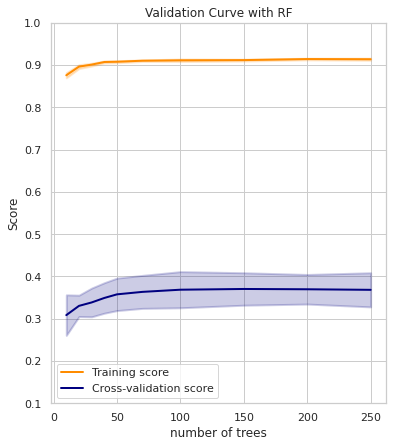

In [790]:
plt.figure(figsize=(6, 7))
# plotting the validation curve for n_estimators
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [791]:
max_depth_range= depthlist

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv=5)

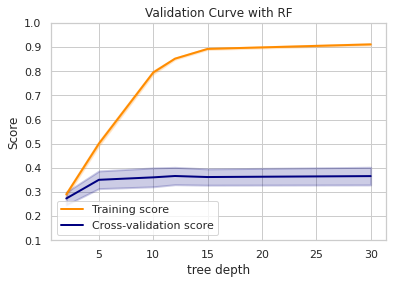

In [792]:
# plotting the validation curve for max_depth

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"tree depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(max_depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(max_depth_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

##### **XGB final estimate of performance**

Using the test set(that has not been used at any stage during the model training andn validation process) the final estimate of the RF model can be reported. 

In [793]:
xgb_final.score(X_test, y_test)

0.37341472824437416

## Model comparison

Lets compare the performance of the models

In [794]:

# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'RF', 'GBDT']
# use the models from above
list_reg_models = [lr, lasso_model, rf_final, xgb_final]

dict_models = dict()

# Element of dict_models: {'LR_VIF': [train_R2, test_R2]}

# Example
# data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
# pd.DataFrame.from_dict(data, orient='index')
#        0  1  2  3
# row_1  3  2  1  0
# row_2  a  b  c  d

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y), model.score(train_x_VIF, train_y) - model.score(test_x_VIF, test_y)]
    elif name == 'LR_LASSO':
        dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y), model.score(train_x, train_y) - model.score(test_x, test_y)]
    else:
        dict_models[name] = [model.score(X_train, y_train), model.score(X_test, y_test),model.score(X_train, y_train) - model.score(X_test, y_test)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff'])
df_models
# you can then export df_models as a csv file and use it in MS Excel or Word

R2_train_data  \
LR_VIF                                     0.3257   
LR_LASSO                                   0.0764   
RF                                         0.8631   
GBDT                                       0.7615   

                                     R2_test_data  \
LR_VIF                                     0.3240   
LR_LASSO                                   0.0760   
RF                                         0.3406   
GBDT                                       0.3734   

                                          R2_diff  
LR_VIF                                     0.0016  
LR_LASSO                                   0.0004  
RF                                         0.5225  
GBDT                                       0.3881

interpreation of model comparison(in results?)

GBDT has higher R2 score on both training and testing data, indicating that this is the best performing model.  
However both GBDT and RF have a rather big r2 difference between the training and testing data indicating bias and overfitting.  The RF has a somewhat smaller R2 difference between the train and testig data indicating that this model is less subject to variance

##### **Interpretation: permutation feature importance**

Using the rfpimp package, the importance of each variable can be computed. For this the testing set needs to be used (not used for model training) to avoid biased results. 

In [795]:
#import rfpimp
impx = rfpimp.importances(xgb_final, X_test, y_test) # permutation
print(impx)
#viz = rfpimp.plot_importances(imp)
#viz.view()

                                                     Importance
Feature                                                        
Asthma                                                   0.0965
Education                                                0.0673
Lead                                                     0.0533
Tox. Release                                             0.0423
Ozone                                                    0.0326
PM2.5                                                    0.0315
Linguistic Isolation                                     0.0263
Poverty                                                  0.0233
Low Birth Weight                                         0.0146
Drinking Water                                           0.0116
Cardiovascular Disease                                   0.0092
Cleanup Sites                                            0.0088
Pesticides                                               0.0081
Groundwater Threats                     

Text(0.5, 1.0, 'Feature importances from the XGB Regressor')

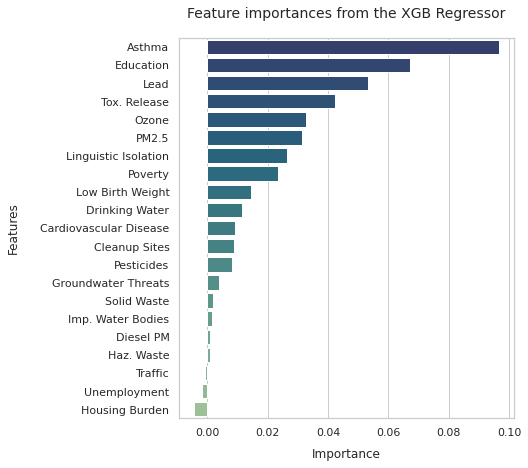

In [796]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 7))

ax = sns.barplot( x="Importance",
                  y=impx.index.values, 
                 #hue="room_type",
                  data=impx,
                  order = impx.index.values,
                  palette="crest_r")

#plt.xlabel(None)
#lt.ylabel(None)

ax.set_xlabel("Importance", 
             fontsize = 12,
             labelpad = 10)
ax.set_ylabel("Features",
             fontsize = 12,
             labelpad = 20)
ax.set_title("Feature importances from the XGB Regressor", size=14, pad = 20)

#plt.savefig("Percentage of Women with higher education2.png", bbox_inches = 'tight', dpi=300)

add the two plots next to each other!

## PCA

This section will test whether using Principle component Analyis(PCA) will improve the prediction results of the best performing model(RF). This dimensionality reduction method will create a set of Prinical Components(new features) from out independent variables based on the highest variance. +++++

In [797]:
# create again the independent and dependent variables
X = dfall.drop(['hpi'], axis = 1)
y = dfall.hpi

# create a list with the names of independent variables
list_var_X = dfall.columns.tolist()
list_var_X.remove('hpi')


Before proceeding, the data needs scaling so that no feature dominates the results.+++

In [798]:
# standardisation of the X. This is essential for PCA.
from sklearn.preprocessing import StandardScaler
Xscaled = StandardScaler().fit_transform(X)

In [799]:
from sklearn.decomposition import PCA

pca = PCA(random_state=random_state)

# fit the components
X_new_components = pca.fit_transform(Xscaled)

In [800]:
print(list_var_X)
print(len(list_var_X))

['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides', 'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']
21


Below we can print the makeup of each component. Each component is a linear combination of the previous independent variables.

In [801]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp

Ozone  \
0                                    0.0976   
1                                   -0.4254   
2                                    0.3281   
3                                   -0.2417   
4                                    0.0463   
5                                    0.0478   
6                                   -0.1554   
7                                   -0.0252   
8                                    0.0221   
9                                    0.0066   
10                                  -0.0075   
11                                  -0.0672   
12                                   0.0301   
13                                   0.0425   
14                                   0.0130   
15                                  -0.3226   
16                                   0.4148   
17                                   0.0268   
18                                   0.3514   
19                                   0.4495   
20                                   0.0628   

                                      PM2.5  \
0                                    0.1979   
1                                   -0.2157   
2                                    0.4617   
3                                    0.0932   
4                                   -0.0716   
5                                    0.0387   
6                                    0.2228   
7                                    0.0081   
8                                   -0.0823   
9                                   -0.1955   
10                                   0.1232   
11                                   0.0906   
12                                  -0.0655   
13                                  -0.0941   
14                                   0.0060   
15                                   0.0585   
16                                   0.0802   
17                                  -0.6532   
18                                  -0.1026   
19                                  -0.3270   
20                                  -0.0252   

                                  Diesel PM  \
0                                    0.1645   
1                                    0.2466   
2                                    0.1523   
3                                    0.3178   
4                                   -0.1682   
5                                    0.3179   
6                                   -0.2330   
7                                    0.0492   
8                                   -0.1382   
9                                    0.0863   
10                                   0.0494   
11                                   0.2104   
12                                  -0.1100   
13                                  -0.5912   
14                                   0.1915   
15                                  -0.3200   
16                                  -0.0188   
17                                   0.1622   
18                                   0.0123   
19                                   0.0240   
20                                   0.0223   

                             Drinking Water  \
0                                    0.1551   
1                                   -0.2728   
2                                    0.4027   
3                                   -0.1668   
4                                    0.2434   
5                                    0.1314   
6                                    0.0369   
7                                    0.0020   
8                                    0.0830   
9                                   -0.1471   
10                                   0.2430   
11                                   0.0268   
12                                   0.0283   
13                                  -0.0293   
14                                   0.1432   
15                                   0.2459   
16                                  -0.4666   
17                                   0.4854   
18                                  -0.0

or visualise it as a heatmap

<AxesSubplot:>

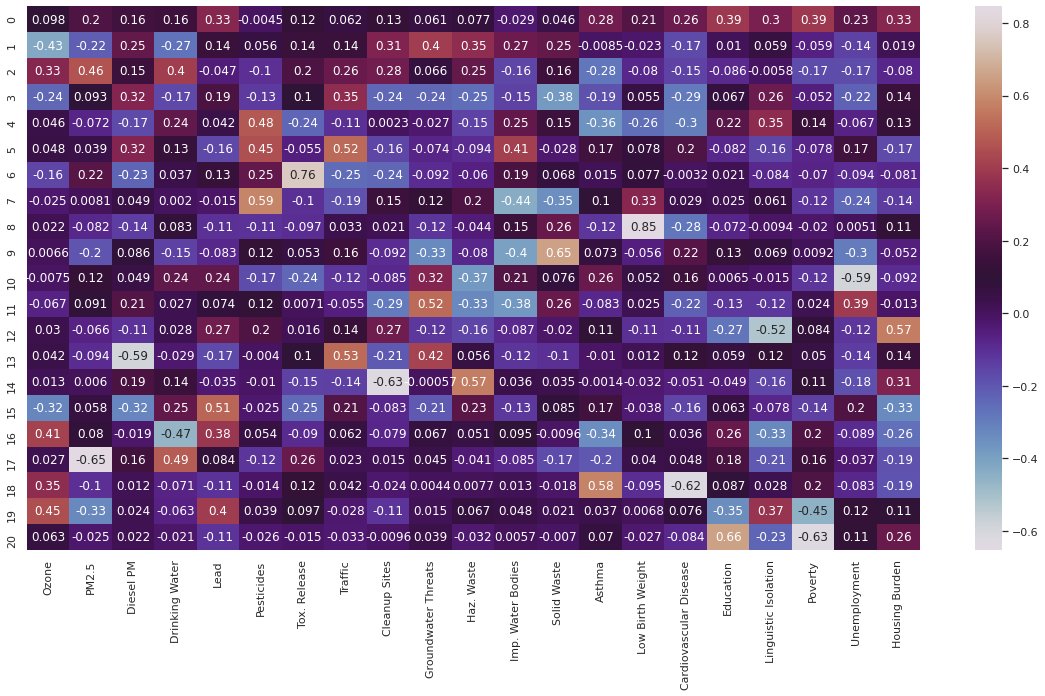

In [802]:
map = pd.DataFrame(pca.components_,columns=df_PrincipleComp.columns )
plt.figure(figsize=(20,10))
sns.heatmap(map,cmap='twilight',annot=True)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.[LINK](https://datascienceplus.com/principal-component-analysis-pca-with-python/)

We can print the proportion of the variance explained by each component:

In [803]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.22207002 0.11643319 0.08936996 0.0720173  0.05887114 0.05080791
 0.04791913 0.04224884 0.03773272 0.03488992 0.03246393 0.03010411
 0.02779085 0.0266969  0.0246026  0.02213964 0.01785956 0.01634482
 0.01184863 0.01020976 0.00757906]


You can get the eigen values of the PCA. The ```explained_variance_``` gives the actual eigen values.

In [804]:
# explained variance is the eigenvalue
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[4.6644682  2.44562003 1.8771708  1.51268694 1.23655846 1.06719439
 1.00651711 0.88741536 0.79255669 0.73284507 0.68188843 0.63232165
 0.58373273 0.56075479 0.51676511 0.46503189 0.37513094 0.34331472
 0.2488745  0.2144509  0.15919422]


One of the use of PCA is to visualise high-dimensional data. Here we can visualise the first two components, using the HPI as the colour.

Text(0, 0.5, 'PC2')

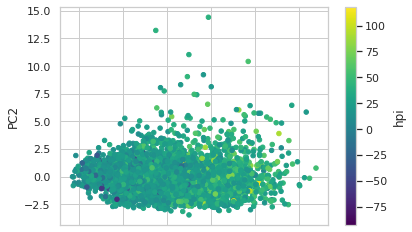

In [805]:
df_X_new_coord = pd.DataFrame(X_new_components)
# adding the y variable to df_X_new_coord
df_X_new_coord = df_X_new_coord.assign(hpi = df.hpi)
ax = df_X_new_coord.plot.scatter(x = 0, y = 1, c = "hpi", colormap="viridis")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

In [806]:
# as PC1 increases MEDV decreases
# as PC2 increases price increases

# this is one way to 'validate' the PCA results and interpret them 

# massive overlap!

try this plot


https://datascienceplus.com/principal-component-analysis-pca-with-python/

https://plotly.com/python/pca-visualization/

https://www.reneshbedre.com/blog/principal-component-analysis.html

### Selecting the number of components

There are different methods for selecting the number of PCA components. 
1.  2 or 3 PCs for visualisation
2.  PC with eigenvalues > 1
3.  Scree plot 

While using 2 or 3 components will allow better visualisation, we will check the components with Eigenvalue larger than 1 and the Scree plot.


In [807]:
count=0
for i in ((pca.explained_variance_)>1).tolist():
    if i==True:
        count+=1
print(f'The PC with Eigenvalue larger that 1 are: {count}')
    

The PC with Eigenvalue larger that 1 are: 7


<AxesSubplot:xlabel='PC'>

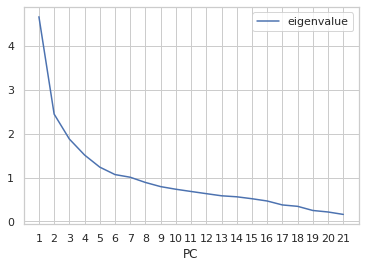

In [808]:
df1 = pd.DataFrame({'eigenvalue':pca.explained_variance_,
             'PC':list(range(1, pca.n_components_ + 1))})
df1.plot.line(x = 'PC', y = 'eigenvalue', xticks=df1.PC.values.tolist())

The plot above does no indicate one definite point as a transition point from a steep change to a gradual flattening. However we could argue that the right values is 3-6 components: the plot decreases quickly before 3 and starts to flatten out after 6.

We can therefore go for the two ends PC=3 or PC=7


### data preparation 

In [809]:
# create a new X dataset including three PCs (subset with the first three principal components)

X_three_pc = X_new_components[:,[0,1,2]]
X_seven_pc =  X_new_components[:,[0,1,2,3,4,5,6]]

In [810]:
#X_PCA = X_three_pc
X_PCA = X_seven_pc

## Random Forest after PCA

https://medium.com/pursuitnotes/random-forest-regression-in-5-steps-with-python-2463b7ae9af8
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
https://mljar.com/blog/visualize-tree-from-random-forest/

In this section, we will use the random forest method for this dataset.

In [811]:
# We apply train_test_split twice to obtain the three train, dev and test sets
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y, test_size=0.3, random_state=random_state)
X_val_PCA, X_test_PCA, y_val_PCA, y_test_PCA = train_test_split(X_test_PCA, y_test_PCA, test_size=0.5, random_state=random_state)

In [812]:
from sklearn.ensemble import RandomForestRegressor
RF_PCA = RandomForestRegressor(random_state=random_state)
RF_PCA.fit(X_train_PCA, y_train_PCA)

RandomForestRegressor(random_state=42)

We can check the R2 score of this model.

In [813]:
print("R2 on the training data:")
print(RF_PCA.score(X=X_train_PCA, y=y_train_PCA))
print("R2 on the testing data:")
print(RF_PCA.score(X= X_test_PCA, y= y_test_PCA))

R2 on the training data:
0.9038671578328059
R2 on the testing data:
0.3351608111070964


much worse performance on the testing data, overfitting. 

NOTE:
results with PC=3:

R2 on the training data:
0.8790137406428171
R2 on the testing data:
0.13102796683521079

##### **Cross-validation**


In [814]:
X_train_PCA = pd.DataFrame(X_train_PCA)
X_val_PCA =pd.DataFrame(X_val_PCA)
y_train_PCA =pd.DataFrame(y_train_PCA)
y_val_PCA= pd.DataFrame(y_val_PCA)

In [815]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val_PCA = pd.concat([X_train_PCA, X_val_PCA])
y_train_val_PCA = pd.concat([y_train_PCA, y_val_PCA])

In [816]:
# set values for the hyperparameters
estimatorlist= [150,200,220]
depthlist= [5,8,10]

In [817]:
%%time
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators': estimatorlist
              ,'max_depth':depthlist
             }
rf = RandomForestRegressor()

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train_val_PCA, y_train_val_PCA.values.ravel())

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 5, 'n_estimators': 150}
The best score is: 
0.3081281261887878
CPU times: user 1min 3s, sys: 300 ms, total: 1min 4s
Wall time: 1min 4s


In [818]:
rf_PCA_final = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'], random_state=random_state)
rf_PCA_final.fit(X_train_PCA, y_train_PCA.values.ravel())

RandomForestRegressor(max_depth=5, n_estimators=150, random_state=42)

In [819]:
print('The score on the training data:')
print(rf_PCA_final.score(X_train_PCA, y_train_PCA))
print('The score on the development data:')
print(rf_PCA_final.score(X_val_PCA, y_val_PCA))

The score on the training data:
0.40654643424002224
The score on the development data:
0.3403601285516533


##### RF_PCA final estimate of performance 

Using the test set(that has not been used at any stage during the model training andn validation process) the final estimate of the RF model can be reported. 

In [820]:
rf_PCA_final.score(X_test_PCA, y_test_PCA)

0.31921178225923086

previous results

0.16709585170935193

## Model comparison

In [821]:
%%time
# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'RF', 'XGB','RF_PCA']
# use the models from above
list_reg_models = [lr, lasso_model, rf_final, xgb_final, rf_PCA_final]

dict_models = dict()



for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y), model.score(train_x_VIF, train_y) - model.score(test_x_VIF, test_y)]
    elif name == 'LR_LASSO':
        dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y), model.score(train_x, train_y) - model.score(test_x, test_y)]
    elif name == 'RF_PCA':
        dict_models[name] = [model.score(X_train_PCA, y_train_PCA), model.score(X_test_PCA, y_test_PCA), model.score(X_train_PCA, y_train_PCA) - model.score(X_test_PCA, y_test_PCA)]
    else:
        dict_models[name] = [model.score(X_train, y_train), model.score(X_test, y_test),model.score(X_train, y_train) - model.score(X_test, y_test)]

# transform dict_models to dataframe
df_models_final = pd.DataFrame.from_dict(dict_models, orient='index', columns=['$R^{2}$ train data', '$R^{2}$ test data', '$R^{2}$ difference'])
df_models_final


CPU times: user 1.03 s, sys: 751 ms, total: 1.79 s
Wall time: 438 ms


$R^{2}$ train data  \
LR_VIF                                     0.3257   
LR_LASSO                                   0.0764   
RF                                         0.8631   
XGB                                        0.7615   
RF_PCA                                     0.4065   

                                $R^{2}$ test data  \
LR_VIF                                     0.3240   
LR_LASSO                                   0.0760   
RF                                         0.3406   
XGB                                        0.3734   
RF_PCA                                     0.3192   

                               $R^{2}$ difference  
LR_VIF                                     0.0016  
LR_LASSO                                   0.0004  
RF                                         0.5225  
XGB                                        0.3881  
RF_PCA                                     0.0873

In [822]:
color1= "black"
color2 = "teal"
#color1= (0.7, 0.2, 0.1)
#color2 = (0.5,0.7,0.8)

# function to visualise the accuracy of the prediction results
def val_vs_predict_plot(yval, yval_predict, ytest, ytest_predict, title):
    yval_array = np.array(yval).flatten()
    ytest_array = np.array(ytest)
    yval_predict_array = np.array(yval_predict)
    ytest_predict_array = np.array(ytest_predict)
    y_values = np.concatenate([yval_array, yval_predict_array]).flatten()
    ymin, ymax = np.amin(y_values), np.amax(y_values)
    plt.subplot(1,3,final_models.index(model)+1)
    plt.scatter(yval_array, yval_predict_array, label=f'validation set  $R^{2}$={R2v:.3f}', color=color1, alpha=0.4)
    plt.scatter(ytest_array, ytest_predict_array, label=f'test set  $R^{2}$={R2t:.3f}', color=color2, alpha=0.4)
    plt.plot([ymin, ymax], [ymin, ymax], color= "red")
    plt.xlabel('actual values', fontsize=12)
    plt.ylabel('predicted values', fontsize=12)
    plt.title(f'{title} Validation-Prediction Plot', fontsize=14,pad = 8)
    plt.tick_params(labelsize=8)
    plt.legend()
    #plt.show()

<a id="ID_results"></a>
## 7.0 | Results

This section summarises the results of the analysis performed. Table (X) lists the different models that were built and calibrated during the analysis.  

Table X

In [823]:
df_models_final

$R^{2}$ train data  \
LR_VIF                                     0.3257   
LR_LASSO                                   0.0764   
RF                                         0.8631   
XGB                                        0.7615   
RF_PCA                                     0.4065   

                                $R^{2}$ test data  \
LR_VIF                                     0.3240   
LR_LASSO                                   0.0760   
RF                                         0.3406   
XGB                                        0.3734   
RF_PCA                                     0.3192   

                               $R^{2}$ difference  
LR_VIF                                     0.0016  
LR_LASSO                                   0.0004  
RF                                         0.5225  
XGB                                        0.3881  
RF_PCA                                     0.0873

As the results illustrate the XGBoost Model records the highest R2 scores on both training and testing data. However, as previously seen, both the XGBoost and The Random Forest model have a significant difference in the R2 scores between training and testing set, which indicates high bias and overfitting.

The linear and lasso models, while performing similarly on the training and testing sets, have poor performance overall. The linear regression model in particular is best rejected as there is no apparent linear relationship between the dependent and independent variables. (Lasso?)

After performing PCA on the dataset, the Random Forest model prediction score has decreased. The drop however in the R2 difference indicates that this model, albeit less accurate perhaps has better generalisation. 


model performance 

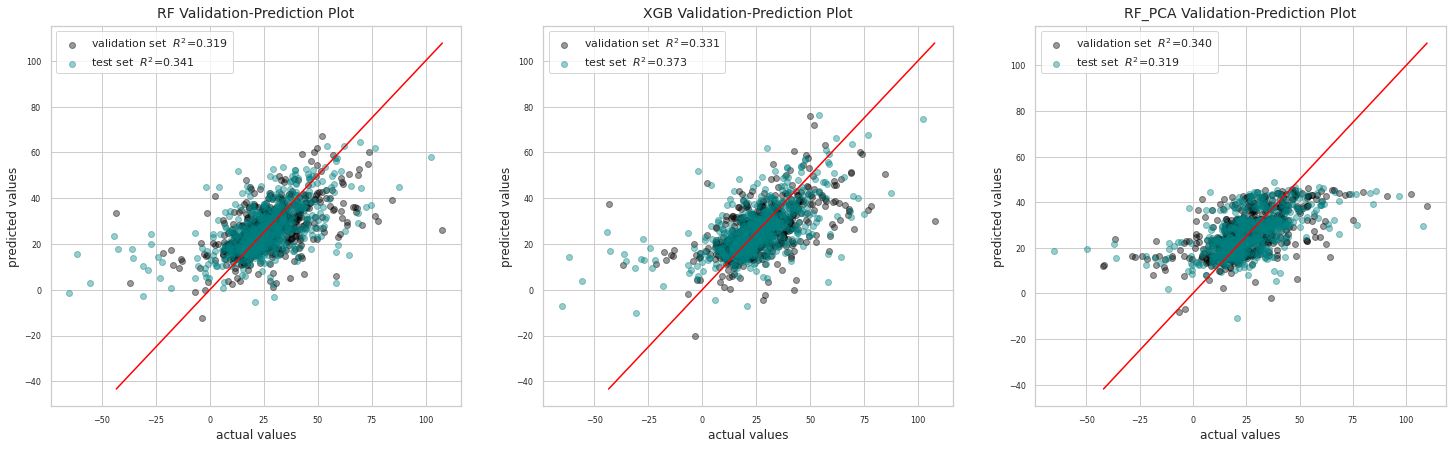

In [824]:
fig, ax = plt.subplots(1,3, figsize=(25, 7) ,sharey=False)

name_models = ['RF', 'XGB','RF_PCA']
final_models = [ rf_final, xgb_final, rf_PCA_final]

for model,name in zip(final_models, name_models):
    if name=='RF_PCA':
        y_pred_val = model.predict(X_val_PCA)
        y_pred_test = model.predict(X_test_PCA)
        R2v=model.score(X_val_PCA, y_val_PCA)
        R2t=model.score(X_test_PCA, y_test_PCA)
        val_vs_predict_plot(y_val_PCA, y_pred_val, y_test_PCA, y_pred_test, name)
    else:
        y_pred_val = model.predict(X_val)
        y_pred_test = model.predict(X_test)
        R2v=model.score(X_val, y_val)
        R2t=model.score(X_test, y_test)
        val_vs_predict_plot(y_val, y_pred_val, y_test, y_pred_test, name) 
        
#plt.savefig("Validation_Prediction_Plots.png", bbox_inches = 'tight')

Feature Importance

Text(0.5, 1.0, 'Feature importances from the XGB Regressor')

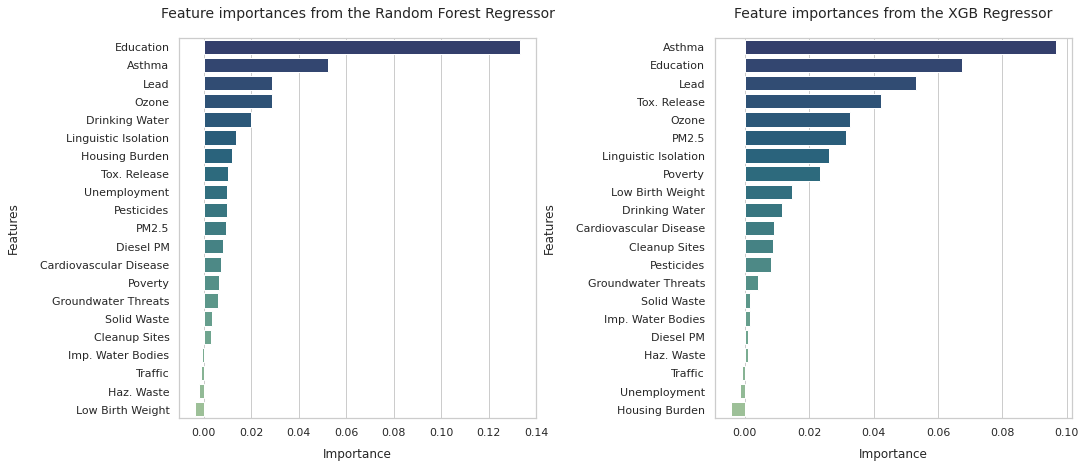

In [825]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1,2, figsize=(16, 7) ,sharey=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=None)

#plot 1
sns.barplot( x="Importance", y=imp.index.values, ax=ax[0],data=imp,order = imp.index.values, palette="crest_r")
ax[0].set_xlabel("Importance", fontsize = 12,labelpad = 10)
ax[0].set_ylabel("Features",fontsize = 12,labelpad = 20)
ax[0].set_title("Feature importances from the Random Forest Regressor", size=14, pad = 20)

#plot 2
sns.barplot( x="Importance", y=impx.index.values, data=impx,ax=ax[1], order = impx.index.values, palette="crest_r")
ax[1].set_xlabel("Importance", fontsize = 12, labelpad = 10)
ax[1].set_ylabel("Features",fontsize = 12, labelpad = 20)
ax[1].set_title("Feature importances from the XGB Regressor", size=14, pad = 20)

#plt.savefig("FeatureImportance_comparison.png", bbox_inches = 'tight', dpi=300)

<a id="ID_disc"></a>
## 9.0 | Discussion 

NOTES:
    
* need 2-3 visualisations

e.g.

1. feature importance plots
2. table of model comparison + PCA comparison?


RF: Robust to Outliers and Non-linear Data. Random forest handles outliers by essentially binning them. It is also indifferent to non-linear features.[LINK](https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706)

Lasso: modification of LINEAR regression. 

Limitations:
    
spatial autocorrelation - spatial dimension [PAPER: Examining the spatial relationship between environmental health factors and
house prices: NO 2 problem?]


2020-2021 covid


spatial unit


ANN

[link](https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/)

This template can be used to fit the Deep Learning ANN regression model on any given dataset.

You can take the pre-processing steps of raw data from any of the case studies here.

Deep ANNs work great when you have a good amount of data available for learning. For small datasets with less than 50K records, I will recommend using the supervised ML models like Random Forests, Adaboosts, XGBoosts, etc.

The simple reason behind this is the high complexity and large computations of ANN. It is not worth it, if you can achieve the same accuracy with a faster and simpler model.

You look at deep learning ANNs only when you have a large amount of data available and the other algorithms are failing or do not fit for the task.

<a id="ID_conc"></a>
## 8.0 | Conclusion

<a id="ID_biblio"></a>
## Bibliography

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29

https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf

https://nycdatascience.com/blog/student-works/house-price-prediction-using-machine-learning-techniques/

https://datascienceplus.com/principal-component-analysis-pca-with-python/

https://medium.com/pursuitnotes/random-forest-regression-in-5-steps-with-python-2463b7ae9af8

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://mljar.com/blog/visualize-tree-from-random-forest/

<a id="ID_append"></a>
## Appendix